### Featurizing text data or Given SQL Queries

In [1]:
#importing essential libararies
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from tqdm import tqdm
from scipy.sparse import hstack
from scipy import sparse
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
#importing the preprocessed data
data = pd.read_csv('feature_extracted_1.csv')

In [6]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

In [8]:
data.columns

Index(['Query', 'Label', 'query_len', 'num_words_query', 'no_single_qts',
       'no_double_qts', 'no_punct', 'no_single_cmnt', 'no_mult_cmnt',
       'no_space', 'no_perc', 'no_log_opt', 'no_arith', 'no_null', 'no_hexa',
       'no_alpha', 'no_digit', 'len_of_chr_char_null', 'genuine_keywords',
       'log_query_len', 'box_query_len'],
      dtype='object')

In [10]:
data.head()

,Query,Label,query_len,num_words_query,no_single_qts,no_double_qts,no_punct,no_single_cmnt,no_mult_cmnt,no_space,...,no_log_opt,no_arith,no_null,no_hexa,no_alpha,no_digit,len_of_chr_char_null,genuine_keywords,log_query_len,box_query_len
0,""" or pg_sleep ( __time__ ) --",1,33,7,0,1,10,1,0,6,...,1,2,0,0,13,0,0,0,3.496508,4.369491
1,create user name identified by pass123 tempora...,1,90,12,0,0,1,0,0,11,...,0,0,0,0,75,3,0,0,4.499810,6.011679
2,and 1 = utl_inaddr.get_host_address ( ...,1,218,35,3,0,25,0,0,35,...,2,0,0,0,120,2,0,2,5.384495,7.637896
3,select * from users where id = '1' or @ @1 ...,1,90,20,3,0,13,1,0,20,...,1,3,0,0,42,5,0,2,4.499810,6.011679
4,"select * from users where id = 1 or 1#"" ( ...",1,85,18,0,1,10,1,0,18,...,1,3,0,0,42,4,0,2,4.442651,5.912577


In [12]:
#dropping the query_len,num_words_query because from the EDA we got to know that it is not very much helpful in predicting the output classes
data.drop(['query_len','num_words_query'],axis= 1,inplace = True)

In [5]:
y = data['Label']
x = data.drop('Label',axis = 1)

#### Splitting the dataset to train and test

In [7]:
#will split the datset in 70 and 30 i.e 70 percent for training and 30 percent for test
#since the class is imbalanced will do stratify sampling

#will remove the target variable i.e label column from datset

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,stratify = y)


print("train dataset size is {}".format(x_train.shape))
print("test dataset size is {}".format(x_test.shape))

train dataset size is (21631, 21)
test dataset size is (9271, 21)


In [9]:
#storing for future use
with open('x_train','wb') as f:
    pickle.dump(x_train,f)
with open('x_test','wb') as f:
    pickle.dump(x_test,f)
with open('y_train','wb') as f:
    pickle.dump(y_train,f)
with open('y_test','wb') as f:
    pickle.dump(y_test,f)

#### Featurizing text data or Given SQL Queries using Bag of words

In [11]:
#using countvectorizer for bag of words
#using bag of words for unigram range

unigram_bow = CountVectorizer(ngram_range = (1,1))
train_bow = unigram_bow.fit(x_train['Query'].values)


print("After Encoding text data")
x_train_bow_unigram = train_bow.transform(x_train['Query'].values)
x_test_bow_unigram = train_bow.transform(x_test['Query'].values)


print("the shape of train dataset unigram is {}".format(x_train_bow_unigram.shape))
print("the shape of test dataset unigram is  {}".format(x_test_bow_unigram.shape))

After Encoding text data
the shape of train dataset unigram is (21631, 18854)
the shape of test dataset unigram is  (9271, 18854)


In [13]:
with open('unigram_bow','wb') as f:
    pickle.dump(unigram_bow,f)

In [15]:
#saving train_bow for future use
with open('train_bow','wb') as f:
    pickle.dump(train_bow,f)

In [17]:
#will use bigram range of values to build bow
bigram_bow = CountVectorizer(ngram_range = (2,2))
train_bigram_bow = bigram_bow.fit(x_train['Query'].values)

print("After Encoding text data")
x_train_bow_bigram = train_bigram_bow.transform(x_train['Query'].values)
x_test_bow_bigram = train_bigram_bow.transform(x_test['Query'].values)


print("the shape of train dataset unigram is {}".format(x_train_bow_bigram.shape))
print("the shape of test dataset unigram is  {}".format(x_test_bow_bigram.shape))

After Encoding text data
the shape of train dataset unigram is (21631, 52268)
the shape of test dataset unigram is  (9271, 52268)


####  Featurizing text data or Given SQL Queries using tfidf vectorizer

In [19]:
#considering only unigrams
tfidf_bow = TfidfVectorizer(ngram_range = (1,1))
tfidf_train_bow = tfidf_bow.fit(x_train['Query'].values)


print("After Encoding text data")
x_train_tfidf_unigram = tfidf_train_bow.transform(x_train['Query'].values)
x_test_tfidf_unigram = tfidf_train_bow.transform(x_test['Query'].values)


print("the shape of train dataset unigram is {}".format(x_train_tfidf_unigram.shape))
print("the shape of test dataset unigram is  {}".format(x_test_tfidf_unigram.shape))

After Encoding text data
the shape of train dataset unigram is (21631, 18854)
the shape of test dataset unigram is  (9271, 18854)


In [21]:
#considering only bigrams
tfidf = TfidfVectorizer(ngram_range = (2,2))
tfidf_train_bigram = tfidf.fit(x_train['Query'].values)


print("After Encoding text data")
x_train_tfidf_bigram = tfidf_train_bigram.transform(x_train['Query'].values)
x_test_tfidf_bigram = tfidf_train_bigram.transform(x_test['Query'].values)


print("the shape of train dataset unigram is {}".format(x_train_tfidf_bigram.shape))
print("the shape of test dataset unigram is  {}".format(x_test_tfidf_bigram.shape))

After Encoding text data
the shape of train dataset unigram is (21631, 52268)
the shape of test dataset unigram is  (9271, 52268)


#### Featurizing text data or Given SQL Queries using Average word2vec

#### Using pretrained Glove vectors for words Embeddings

In [27]:
# Define the path to the GloVe file
glove_file = 'glove.6B.300d.txt'

# Initialize an empty dictionary to store the word vectors
model = {}

# Read the file and load the vectors
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]                     # The first token is the word
        vector = list(map(float, values[1:])) # The remaining tokens are the vector values
        model[word] = vector

# Now, you can use model as your word embedding dictionary
glove_words = set(model.keys())


In [28]:
#compute average word2vec for each train data query
avg_w2v_vectors_train = [] 
for sentence in tqdm(x_train['Query'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split(): 
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 21631/21631 [00:09<00:00, 2327.82it/s]

21631
300


In [31]:
#compute average word2vec for each test data query
avg_w2v_vectors_test = [] 
for sentence in tqdm(x_test['Query'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split(): 
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 9271/9271 [00:03<00:00, 2454.86it/s]


9271
300


####  Featurizing text data or Given SQL Queries using Tfidf weighted word2vec

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit the TF-IDF Vectorizer
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['Query'].values)

# Converting a dictionary with words as keys and the IDF values as values
dictionary = dict(zip(tfidf_model.get_feature_names_out(), list(tfidf_model.idf_)))

# Creating a set of TF-IDF words
tfidf_words = set(tfidf_model.get_feature_names_out())


In [37]:
import numpy as np
from tqdm import tqdm

tfidf_w2v_vectors_train = []
for sentence in tqdm(x_train['Query'].values):
    vector = np.zeros(300)
    tf_idf_weight = 0
    words = sentence.split()
    for word in words:
        if word in glove_words and word in tfidf_words:
            vec = np.array(model[word])  # Convert to NumPy array
            tf_idf = dictionary[word] * (words.count(word) / len(words))
            vector += vec * tf_idf
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))


100%|██████████| 21631/21631 [00:05<00:00, 3864.80it/s]

21631
300


In [41]:
import numpy as np
from tqdm import tqdm

tfidf_w2v_vectors_test = []
for sentence in tqdm(x_test['Query'].values):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if word in glove_words and word in tfidf_words:
            vec = np.array(model[word])  # Convert to NumPy array
            tf_idf = dictionary[word] * (sentence.count(word) / len(sentence.split()))
            vector += vec * tf_idf
            tf_idf_weight += tf_idf
    if tf_idf_weight:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))


100%|██████████| 9271/9271 [00:02<00:00, 3694.02it/s]

9271
300


#### Encoding Numerical features

#### Encoding Numerical feature : number of single line quotation marks

'''
Since we have numerical features will transform the numerical features using standardscaler method

'''
#Generalized function for standardscaler method
def transform(x_train,x_test):
    sc = StandardScaler()
    sc.fit(x_train.reshape(-1,1))
    train_d = sc.transform(x_train.reshape(-1,1))
    test_d = sc.transform(x_test.reshape(-1,1))
    return train_d,test_d


train_no_single_qts,test_no_single_qts  = transform(np.array(x_train['no_single_qts']).reshape(-1,1),np.array(x_test['no_single_qts']).reshape(-1,1))


print("the shape of no_single_qts after Encoding is {}".format(train_no_single_qts.shape))

#### Encoding Numerical feature : number of double line quotation marks

In [48]:
train_no_double_qts,test_no_double_qts  = transform(np.array(x_train['no_double_qts']).reshape(-1,1),np.array(x_test['no_double_qts']).reshape(-1,1))

print("the shape of no_double_qts after Encoding is {}".format(train_no_double_qts.shape))

the shape of no_double_qts after Encoding is (21631, 1)


#### Encoding Numerical feature : number of punctuations

In [51]:
#alpha value is choosen as 1 because if there are no elements present then denominator will be zero

train_no_punct,test_no_punct  = transform(np.array(x_train['no_punct']).reshape(-1,1),np.array(x_test['no_punct']).reshape(-1,1))

print("the shape of no_punct after Encoding is {}".format(test_no_punct.shape))

the shape of no_punct after Encoding is (9271, 1)


#### Encoding Numerical feature : number of single line comments

In [54]:
train_no_single_cmnt,test_no_single_cmnt  = transform(np.array(x_train['no_single_cmnt']).reshape(-1,1),np.array(x_test['no_single_cmnt']).reshape(-1,1))

print("the shape of no_single_cmnt after Encoding is {}".format(train_no_single_cmnt.shape))

the shape of no_single_cmnt after Encoding is (21631, 1)


#### Encoding Numerical feature : number of multi line comments

In [57]:
train_no_mult_cmnt,test_no_mult_cmnt = transform(np.array(x_train['no_mult_cmnt']).reshape(-1,1),np.array(x_test['no_mult_cmnt']).reshape(-1,1))

print("the shape of no_mult_cmnt after Encoding is {}".format(train_no_mult_cmnt.shape))

the shape of no_mult_cmnt after Encoding is (21631, 1)


#### Encoding Numerical feature : number of space

In [60]:
train_no_space,test_no_space  = transform(np.array(x_train['no_space']).reshape(-1,1),np.array(x_test['no_space']).reshape(-1,1))

print("the shape of no_space after Encoding is {}".format(train_no_space.shape))

the shape of no_space after Encoding is (21631, 1)


#### Encoding Numerical feature : number of percentage symbols

In [63]:
train_no_perc,test_no_perc  = transform(np.array(x_train['no_perc']).reshape(-1,1),np.array(x_test['no_perc']).reshape(-1,1))

print("the shape of no_perc after Encoding is {}".format(train_no_perc.shape))

the shape of no_perc after Encoding is (21631, 1)


#### Encoding Numerical feature : number of logical operators

In [66]:
train_no_log_opt,test_no_log_opt  = transform(np.array(x_train['no_log_opt']).reshape(-1,1),np.array(x_test['no_log_opt']).reshape(-1,1))

print("the shape of no_log_opt after Encoding is {}".format(train_no_log_opt.shape))

the shape of no_log_opt after Encoding is (21631, 1)


#### Encoding Numerical feature : number of arithmetic operators

In [69]:
train_no_arith_opt,test_no_arith_opt  = transform(np.array(x_train['no_arith']).reshape(-1,1),np.array(x_test['no_arith']).reshape(-1,1))

print("the shape of no_arith_opt after Encoding is {}".format(train_no_arith_opt.shape))

the shape of no_arith_opt after Encoding is (21631, 1)


#### Encoding Numerical feature : number of null values

In [72]:
train_no_null,test_no_null  = transform(np.array(x_train['no_null']).reshape(-1,1),np.array(x_test['no_null']).reshape(-1,1))

print("the shape of no_null after Encoding is {}".format(train_no_null.shape))

the shape of no_null after Encoding is (21631, 1)


#### Encoding Numerical feature : number of hexadecimal values

In [75]:
train_no_hexa,test_no_hexa = transform(np.array(x_train['no_hexa']).reshape(-1,1),np.array(x_test['no_hexa']).reshape(-1,1))

print("the shape of no_hexa after Encoding is {}".format(train_no_hexa.shape))

the shape of no_hexa after Encoding is (21631, 1)


#### Encoding Numerical feature : number of alphabets

In [78]:
train_no_alpha,test_no_alpha = transform(np.array(x_train['no_alpha']).reshape(-1,1),np.array(x_test['no_alpha']).reshape(-1,1)) 

print("the shape of no_alpha after Encoding is {}".format(train_no_alpha.shape))

the shape of no_alpha after Encoding is (21631, 1)


#### Encoding Numerical feature : number of digits

In [81]:
train_no_digit,test_no_digit = transform(np.array(x_train['no_digit']).reshape(-1,1),np.array(x_test['no_digit']).reshape(-1,1))

print("the shape of no_digit after Encoding is {}".format(train_no_digit.shape))

the shape of no_digit after Encoding is (21631, 1)


#### Encoding Numerical feature : length of che,char and null keywords combined

In [84]:
train_len_of_chr_char_null,test_len_of_chr_char_null  = transform(np.array(x_train['len_of_chr_char_null']).reshape(-1,1),np.array(x_test['len_of_chr_char_null']).reshape(-1,1))

print("the shape of len_of_chr_char_null after Encoding is {}".format(train_len_of_chr_char_null.shape))

the shape of len_of_chr_char_null after Encoding is (21631, 1)


#### Encoding Numerical feature : length of genuine_keywords

In [87]:
train_genuine_keywords,test_genuine_keywords  = transform(np.array(x_train['genuine_keywords']).reshape(-1,1),np.array(x_test['genuine_keywords']).reshape(-1,1))

print("the shape of genuine_keywords after Encoding is {}".format(train_genuine_keywords.shape))

the shape of genuine_keywords after Encoding is (21631, 1)


### Combining all the features encoded above

#### Concatenating Encoded features with bag of words unigram range encoding

In [91]:
train_data_bow_unigram = hstack((x_train_bow_unigram,train_no_single_qts,train_no_double_qts,train_no_punct,train_no_single_cmnt,train_no_mult_cmnt,train_no_space,train_no_perc,train_no_log_opt,train_no_arith_opt,train_no_null,train_no_hexa,train_no_alpha,train_no_digit,train_len_of_chr_char_null,train_genuine_keywords)).tocsr()
test_data_bow_unigram = hstack((x_test_bow_unigram,test_no_single_qts,test_no_double_qts,test_no_punct,test_no_single_cmnt,test_no_mult_cmnt,test_no_space,test_no_perc,test_no_log_opt,test_no_arith_opt,test_no_null,test_no_hexa,test_no_alpha,test_no_digit,test_len_of_chr_char_null,test_genuine_keywords)).tocsr()

#### Concatenating Encoded features with bag of words bigram range encoding

In [94]:
train_data_bow_bigram = hstack((x_train_bow_bigram,train_no_single_qts,train_no_double_qts,train_no_punct,train_no_single_cmnt,train_no_mult_cmnt,train_no_space,train_no_perc,train_no_log_opt,train_no_arith_opt,train_no_null,train_no_hexa,train_no_alpha,train_no_digit,train_len_of_chr_char_null,train_genuine_keywords)).tocsr()
test_data_bow_bigram = hstack((x_test_bow_bigram,test_no_single_qts,test_no_double_qts,test_no_punct,test_no_single_cmnt,test_no_mult_cmnt,test_no_space,test_no_perc,test_no_log_opt,test_no_arith_opt,test_no_null,test_no_hexa,test_no_alpha,test_no_digit,test_len_of_chr_char_null,test_genuine_keywords)).tocsr()

#### Concatenating Encoded features with tfidf vectorizer unigram encoding

In [97]:
train_data_tfidf_unigram = hstack((x_train_tfidf_unigram,train_no_single_qts,train_no_double_qts,train_no_punct,train_no_single_cmnt,train_no_mult_cmnt,train_no_space,train_no_perc,train_no_log_opt,train_no_arith_opt,train_no_null,train_no_hexa,train_no_alpha,train_no_digit,train_len_of_chr_char_null,train_genuine_keywords)).tocsr()
test_data_tfidf_unigram = hstack((x_test_tfidf_unigram,test_no_single_qts,test_no_double_qts,test_no_punct,test_no_single_cmnt,test_no_mult_cmnt,test_no_space,test_no_perc,test_no_log_opt,test_no_arith_opt,test_no_null,test_no_hexa,test_no_alpha,test_no_digit,test_len_of_chr_char_null,test_genuine_keywords)).tocsr()

####  Concatenating Encoded features with tfidf vectorizer bigram encoding

In [100]:
train_data_tfidf_bigram = hstack((x_train_tfidf_bigram,train_no_single_qts,train_no_double_qts,train_no_punct,train_no_single_cmnt,train_no_mult_cmnt,train_no_space,train_no_perc,train_no_log_opt,train_no_arith_opt,train_no_null,train_no_hexa,train_no_alpha,train_no_digit,train_len_of_chr_char_null,train_genuine_keywords)).tocsr()
test_data_tfidf_bigram = hstack((x_test_tfidf_bigram,test_no_single_qts,test_no_double_qts,test_no_punct,test_no_single_cmnt,test_no_mult_cmnt,test_no_space,test_no_perc,test_no_log_opt,test_no_arith_opt,test_no_null,test_no_hexa,test_no_alpha,test_no_digit,test_len_of_chr_char_null,test_genuine_keywords)).tocsr()

#### Concatenating Encoded features with Average word2vec

In [103]:
train_data_avg_word2vec = np.hstack((np.array(avg_w2v_vectors_train),train_no_single_qts,train_no_double_qts,train_no_punct,train_no_single_cmnt,train_no_mult_cmnt,train_no_space,train_no_perc,train_no_log_opt,train_no_arith_opt,train_no_null,train_no_hexa,train_no_alpha,train_no_digit,train_len_of_chr_char_null,train_genuine_keywords))
test_data_avg_word2vec = np.hstack((np.array(avg_w2v_vectors_test),test_no_single_qts,test_no_double_qts,test_no_punct,test_no_single_cmnt,test_no_mult_cmnt,test_no_space,test_no_perc,test_no_log_opt,test_no_arith_opt,test_no_null,test_no_hexa,test_no_alpha,test_no_digit,test_len_of_chr_char_null,test_genuine_keywords))

#### Concatenating Encoded features with tfidf word2vec

In [106]:
train_data_tfidf_word2vec = np.hstack((np.array(tfidf_w2v_vectors_train),train_no_single_qts,train_no_double_qts,train_no_punct,train_no_single_cmnt,train_no_mult_cmnt,train_no_space,train_no_perc,train_no_log_opt,train_no_arith_opt,train_no_null,train_no_hexa,train_no_alpha,train_no_digit,train_len_of_chr_char_null,train_genuine_keywords))
test_data_tfidf_word2vec = np.hstack((np.array(tfidf_w2v_vectors_test),test_no_single_qts,test_no_double_qts,test_no_punct,test_no_single_cmnt,test_no_mult_cmnt,test_no_space,test_no_perc,test_no_log_opt,test_no_arith_opt,test_no_null,test_no_hexa,test_no_alpha,test_no_digit,test_len_of_chr_char_null,test_genuine_keywords))

In [108]:
#storing all features generated above for further use
sparse.save_npz("train_data_bow_unigram",train_data_bow_unigram)
sparse.save_npz("test_data_bow_bigram.npz",test_data_bow_bigram)
sparse.save_npz("train_data_tfidf_unigram.npz",train_data_tfidf_unigram)
sparse.save_npz("train_data_tfidf_bigram.npz",train_data_tfidf_bigram)

In [110]:
sparse.save_npz("test_data_bow_unigram",test_data_bow_unigram)
sparse.save_npz("train_data_bow_bigram.npz",train_data_bow_bigram)
sparse.save_npz("test_data_tfidf_unigram.npz",test_data_tfidf_unigram)
sparse.save_npz("test_data_tfidf_bigram.npz",test_data_tfidf_bigram)

In [112]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [114]:
#using pickle files to store word2vec numpy arrays
with open('train_data_avg_word2vec','wb') as f:
    pickle.dump(train_data_avg_word2vec,f)
    
with open('test_data_avg_word2vec','wb') as f:
    pickle.dump(test_data_avg_word2vec,f)
    
with open('train_data_tfidf_word2vec','wb') as f:
    pickle.dump(train_data_tfidf_word2vec,f)
    
with open('test_data_tfidf_word2vec','wb') as f:
    pickle.dump(test_data_tfidf_word2vec,f)

In [127]:
#importing neccessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,log_loss
from sklearn.linear_model import LogisticRegression
from scipy import sparse
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import joblib
from prettytable import PrettyTable
from xgboost import plot_importance

## Machine Learning Models

In [130]:
#writing generalised function to plot the confusion matrix,precision and recall matrix
#this code is taken from case studies of APPlied AI course
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [0,1]
    plt.figure(figsize = (20,5))
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

#### Building Random model to find worst case F1-Score

###### First will build the models with unigram bag of words train and test data

In [134]:
data = pd.read_csv('feature_extracted_1.csv')

In [136]:
data.drop(['Unnamed: 0','query_len','num_words_query'],axis = 1,inplace = True)

In [138]:
#first will load the npz file of unigram words train and test data
bow_unigram_train = sparse.load_npz('train_data_bow_unigram.npz')
bow_unigram_test = sparse.load_npz('test_data_bow_unigram.npz')
with open('y_train','rb') as f:
    y_train = pickle.load(f)
    
with open('y_test','rb') as f:
    y_test = pickle.load(f)

In [140]:
y_train = np.array(y_train)
y_test = np.array(y_test)

f1-score on test data using Random model 0.420767048957948


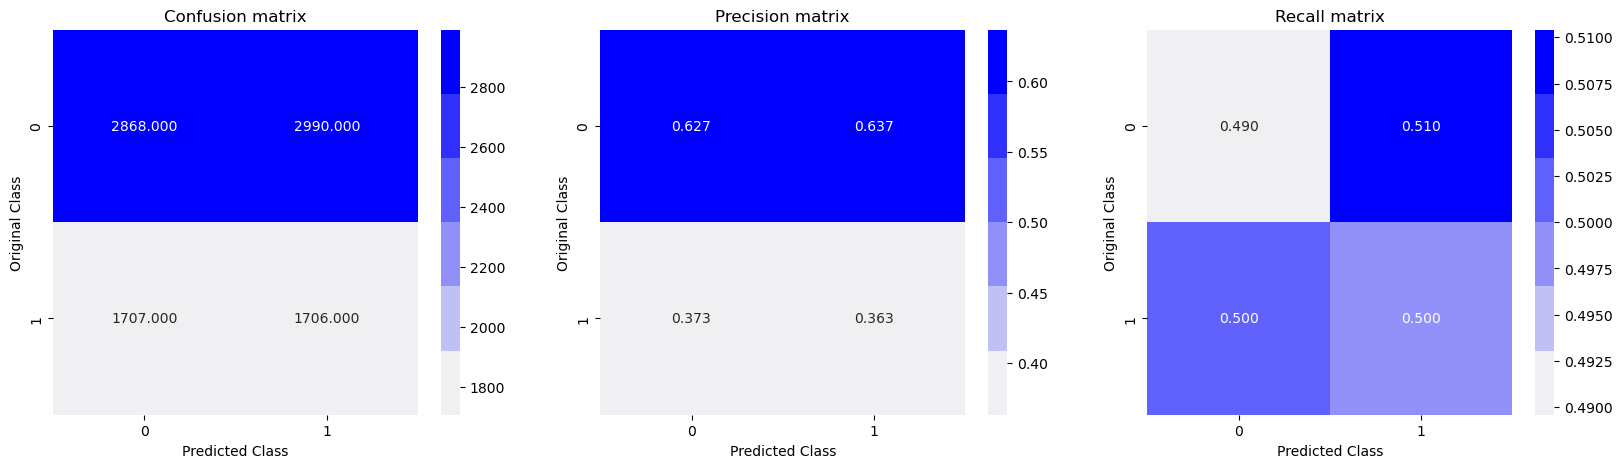

In [142]:
#https://stackoverflow.com/a/18662466/4084039
pred_y = np.zeros((len(y_test),2))
for i in range(len(y_test)):
    prob = np.random.rand(1,2)
    pred_y[i] = ((prob/sum(sum(prob)))[0])


pred_y =np.argmax(pred_y, axis=1)
print("f1-score on test data using Random model {}".format(f1_score(y_test,pred_y)))
plot_confusion_matrix(y_test, pred_y)

###### As we can see from the above result the worst case f1 score is 0.42. So the f1 score should be more than the above f1 score

In [145]:
'''
writing generalized function for model building
'''
def build_model(loss,train_data,test_data):
    '''
    loss is a string parameter it can be either log or hinge
    '''
    alpha = [10 ** x for x in range(-5, 2)]

    #using sgdclassifier with given loss
    f1_array = []
    for i in alpha:
        s = SGDClassifier(alpha = i,loss = loss,penalty = 'l2',random_state = 42)
        s.fit(train_data,y_train)
        pred_y = s.predict(test_data)
        f1_array.append(f1_score(y_test, pred_y, labels=s.classes_))
        print('For values of alpha = ', i, "The f1-score is:",f1_score(y_test, pred_y, labels=s.classes_))


    #plotting alpha vs f1-score
    plt.plot(alpha,f1_array)
    plt.title('alpha vs f1-score')
    plt.xlabel('alpha values')
    plt.ylabel('f1-score values')
    plt.show()

    index = np.argmax(f1_array)
    best_alpha = alpha[index]
    print("the best alpha value is {} having maximum f1-score".format(best_alpha))

    #will train the data using best alpha value generated above
    clf = SGDClassifier(alpha = best_alpha,loss=loss,penalty = 'l2',random_state = 42)
    clf.fit(train_data,y_train)
    pred_y = clf.predict(train_data)
    print("For the value of alpha {} train data f1-score is {}".format(best_alpha,f1_score(y_train,pred_y)))
    pred_y = clf.predict(test_data)
    print("For the value of alpha {} test data f1-score is {}".format(best_alpha,f1_score(y_test,pred_y)))
    plot_confusion_matrix(y_test,pred_y)
    

#### Logistic Regression with Hyperparameter Tuning

For values of alpha =  1e-05 The f1-score is: 0.9935275080906149
For values of alpha =  0.0001 The f1-score is: 0.9901136195956913
For values of alpha =  0.001 The f1-score is: 0.983995257854179
For values of alpha =  0.01 The f1-score is: 0.9481413492427719
For values of alpha =  0.1 The f1-score is: 0.8869229531928583
For values of alpha =  1 The f1-score is: 0.8358735761270656
For values of alpha =  10 The f1-score is: 0.8407523510971787


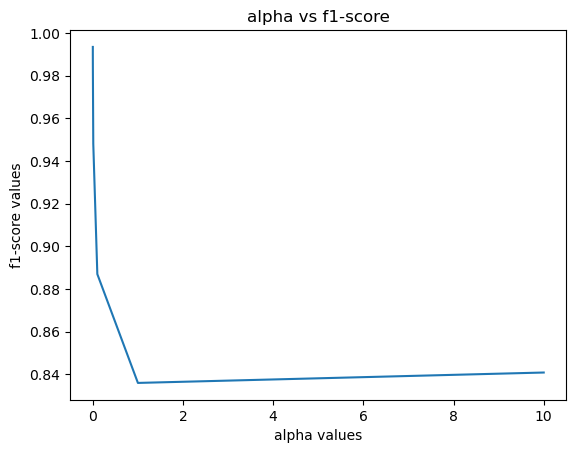

the best alpha value is 1e-05 having maximum f1-score
For the value of alpha 1e-05 train data f1-score is 0.996219281663516
For the value of alpha 1e-05 test data f1-score is 0.9935275080906149


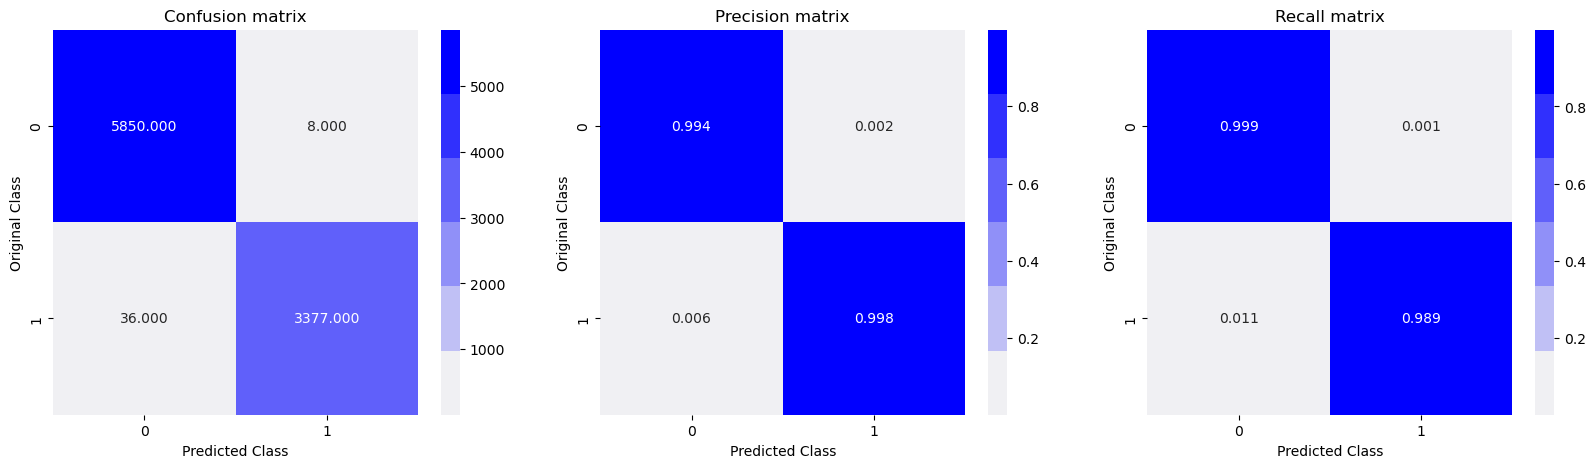

In [150]:
#unigram bag of words
#using build model function above and passing loss as log
build_model('log_loss', bow_unigram_train, bow_unigram_test)


#### Linear SVM with Hyperparameter Tuning

For values of alpha =  1e-05 The f1-score is: 0.9926340601060696
For values of alpha =  0.0001 The f1-score is: 0.9924900603740244
For values of alpha =  0.001 The f1-score is: 0.9895233879297625
For values of alpha =  0.01 The f1-score is: 0.9783639596917605
For values of alpha =  0.1 The f1-score is: 0.909148364670564
For values of alpha =  1 The f1-score is: 0.8265839320705421
For values of alpha =  10 The f1-score is: 0.8378378378378378


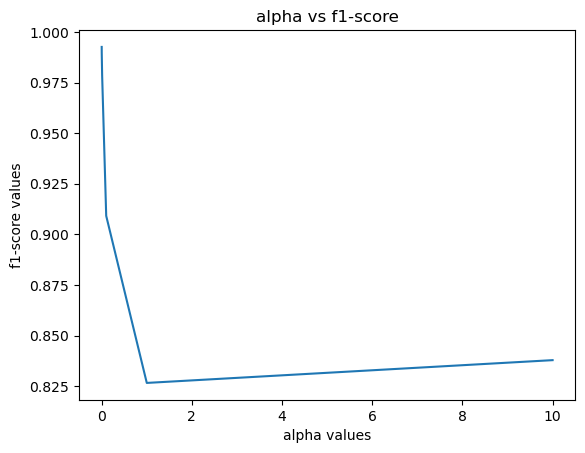

the best alpha value is 1e-05 having maximum f1-score
For the value of alpha 1e-05 train data f1-score is 0.9984279695654907
For the value of alpha 1e-05 test data f1-score is 0.9926340601060696


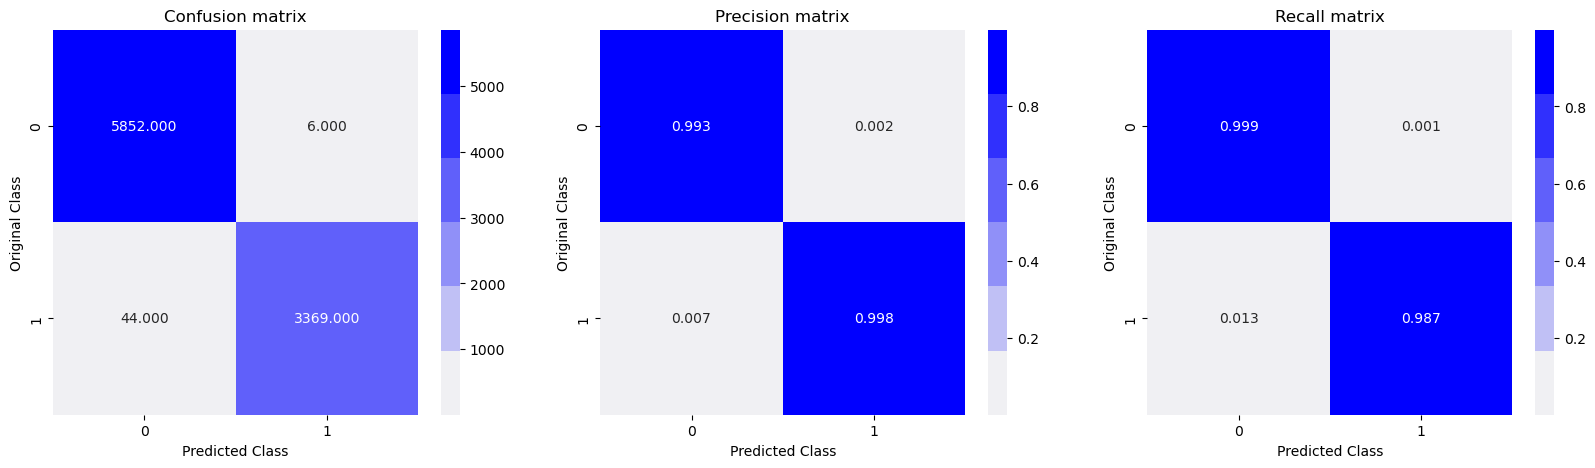

In [153]:
#unigram bag of words
#will choose loss as hinge for svm
build_model('hinge',bow_unigram_train,bow_unigram_test)

#### XGboost with hyperparameter Tuning

In [156]:
parameters = {
    
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'n_estimators':[100,200,300],
    'gamma':[0,0.25,0.5],
    'reg_lambda':[0,0.10,10.0]
}

model = xgb.XGBClassifier(eval_metric='logloss')
search = RandomizedSearchCV(model,parameters,scoring = 'f1',cv=3,return_train_score=True,n_jobs = -1)
search.fit(bow_unigram_train,y_train)

results = pd.DataFrame.from_dict(search.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.550676,0.065712,0.122945,0.022249,10.0,300,5,0.01,0.25,"{'reg_lambda': 10.0, 'n_estimators': 300, 'max...",...,0.982235,0.984586,0.984697,0.002057,6,0.985137,0.987070,0.984563,0.985590,0.001072
1,4.288152,0.067980,0.063217,0.002111,0.1,200,4,0.01,0,"{'reg_lambda': 0.1, 'n_estimators': 200, 'max_...",...,0.977360,0.980707,0.979651,0.001622,9,0.979791,0.983103,0.980482,0.981125,0.001426
2,2.032837,0.013834,0.038687,0.003850,0.1,100,4,0.1,0.5,"{'reg_lambda': 0.1, 'n_estimators': 100, 'max_...",...,0.993387,0.993578,0.993263,0.000320,4,0.996414,0.995939,0.995748,0.996034,0.000280
3,4.366197,0.020686,0.063973,0.003526,0,200,4,0.01,0.5,"{'reg_lambda': 0, 'n_estimators': 200, 'max_de...",...,0.977547,0.980707,0.979714,0.001534,8,0.979791,0.983103,0.980482,0.981125,0.001426
4,4.181833,0.128344,0.081447,0.009372,10.0,300,4,0.1,0.5,"{'reg_lambda': 10.0, 'n_estimators': 300, 'max...",...,0.994897,0.995473,0.994965,0.000391,3,0.996791,0.996224,0.995653,0.996223,0.000465


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
XGboost train data f1-score is 0.9985535500911892
XGboost test data f1-score is 0.996914940502424


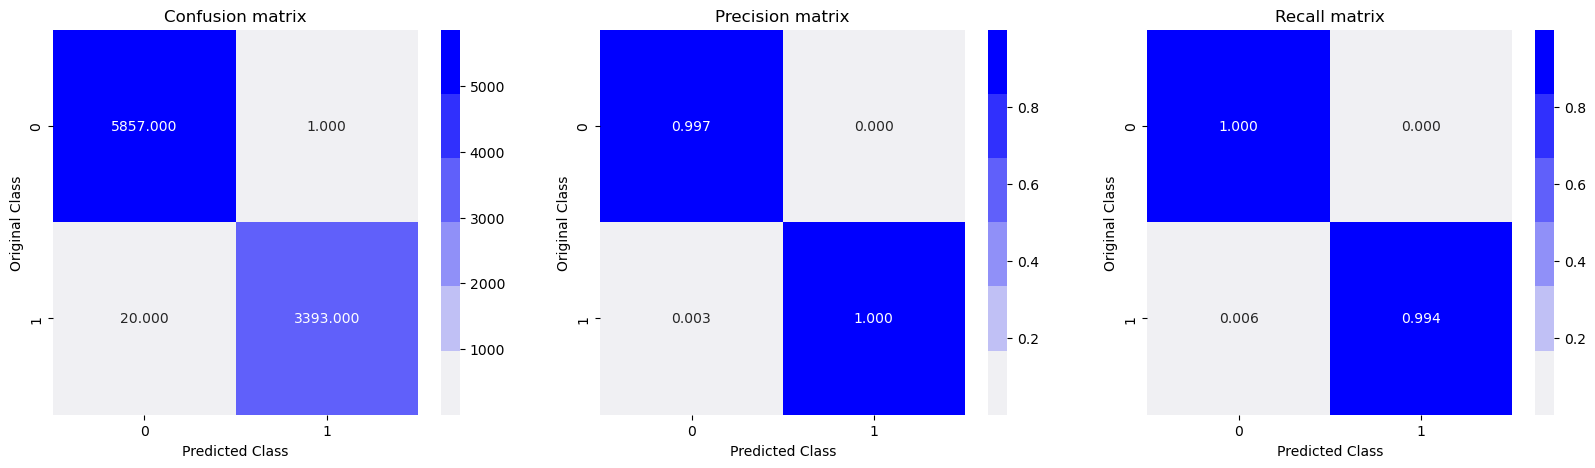

In [158]:
#printing the best parameters to train xgboost
print(search.best_estimator_)
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',learning_rate =0.1 ,gamma = 0,n_estimators =300 ,max_depth = 5,reg_lambda =0.1 ,sub_sample = 0.9,colsample_bytree = 0.5)
clf_xgb.fit(bow_unigram_train,y_train,verbose = True)
pred_y = clf_xgb.predict(bow_unigram_train)
print("XGboost train data f1-score is {}".format(f1_score(y_train,pred_y)))
pred_y = clf_xgb.predict(bow_unigram_test)
print("XGboost test data f1-score is {}".format(f1_score(y_test,pred_y)))
plot_confusion_matrix(y_test,pred_y)

#### Summary of Unigram bag of words Encoding ML models F1 scores

In [161]:
x = PrettyTable()
x.field_names = ["Model \ Parameters","Train f1_score","Test f1_score"]
x.add_row(["Logistic regression: ",0.996, 0.993])
x.add_row(["Linear SVM",0.998,0.994])
x.add_row(["XGBClassifier: ",0.998,0.995])
print(x)

+-----------------------+----------------+---------------+
|   Model \ Parameters  | Train f1_score | Test f1_score |
+-----------------------+----------------+---------------+
| Logistic regression:  |     0.996      |     0.993     |
|       Linear SVM      |     0.998      |     0.994     |
|    XGBClassifier:     |     0.998      |     0.995     |
+-----------------------+----------------+---------------+


In [163]:
#saving the XGboost model because it is having better f1-score
joblib.dump(clf_xgb,'saved_model_unigram_bow.pkl')

['saved_model_unigram_bow.pkl']

#### Applying Logistic regression for Bigram bag of words

In [166]:
#first will load the data from npz files
bow_bigram_train = sparse.load_npz('train_data_bow_bigram.npz')
bow_bigram_test = sparse.load_npz('test_data_bow_bigram.npz')

For values of alpha =  1e-05 The f1-score is: 0.9858823529411764
For values of alpha =  0.0001 The f1-score is: 0.9853917662682603
For values of alpha =  0.001 The f1-score is: 0.9755879726108961
For values of alpha =  0.01 The f1-score is: 0.924516531503431
For values of alpha =  0.1 The f1-score is: 0.8847452178106414
For values of alpha =  1 The f1-score is: 0.8447380840018877
For values of alpha =  10 The f1-score is: 0.8383759209907509


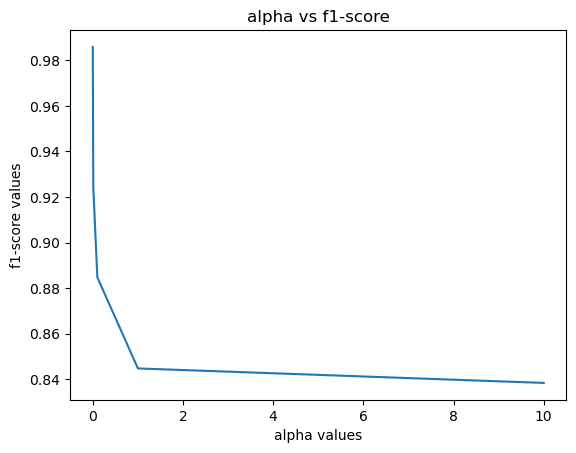

the best alpha value is 1e-05 having maximum f1-score
For the value of alpha 1e-05 train data f1-score is 0.9950788643533123
For the value of alpha 1e-05 test data f1-score is 0.9858823529411764


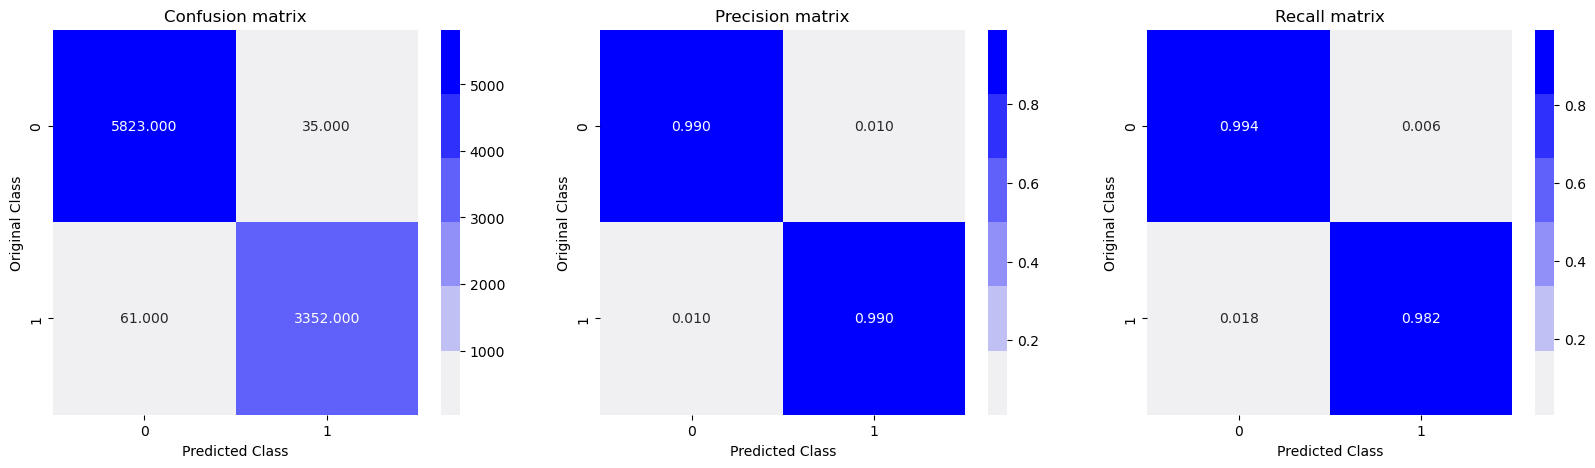

In [170]:
#using bigram bOW for building the model
build_model('log_loss', bow_bigram_train, bow_bigram_test)


#### Linear SVM with Hyperparameter Tuning

For values of alpha =  1e-05 The f1-score is: 0.9885125184094257
For values of alpha =  0.0001 The f1-score is: 0.9880654191837336
For values of alpha =  0.001 The f1-score is: 0.9828351583308671
For values of alpha =  0.01 The f1-score is: 0.9418461538461539
For values of alpha =  0.1 The f1-score is: 0.8987905792488861
For values of alpha =  1 The f1-score is: 0.8421384639646743
For values of alpha =  10 The f1-score is: 0.8380116042026031


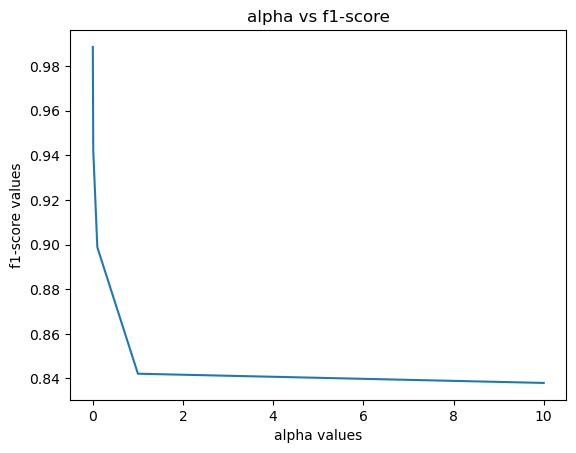

the best alpha value is 1e-05 having maximum f1-score
For the value of alpha 1e-05 train data f1-score is 0.9965402277159212
For the value of alpha 1e-05 test data f1-score is 0.9885125184094257


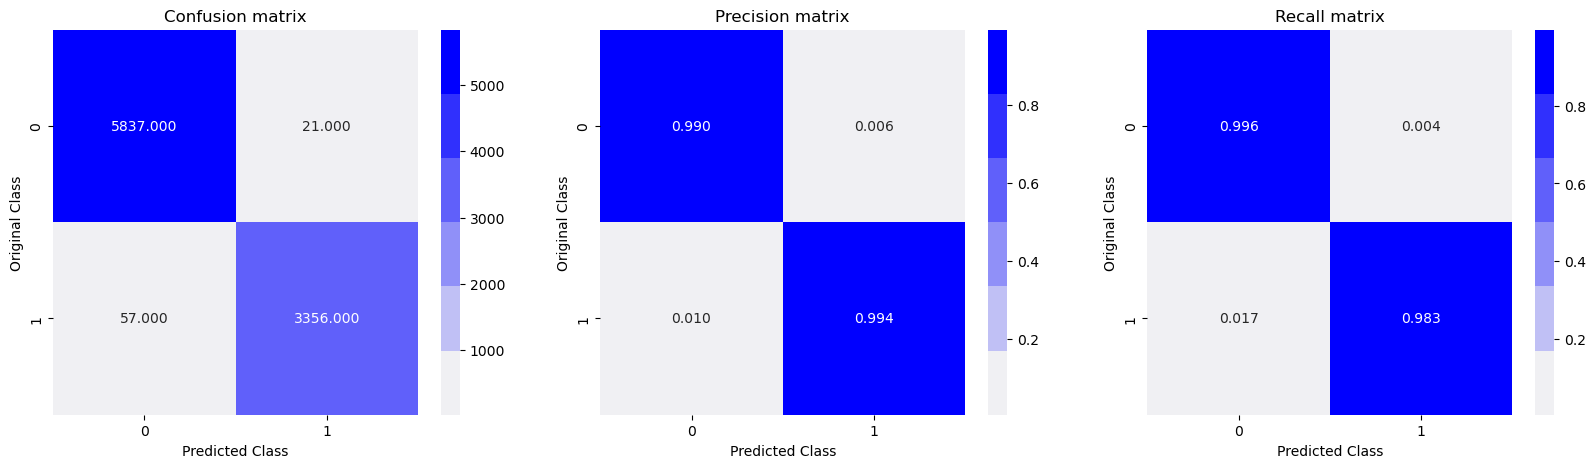

In [173]:
#linear svm for bigram bag of words
build_model('hinge',bow_bigram_train,bow_bigram_test)

#### XGboost with Hyperparameter tuning

In [177]:
parameters = {
    
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'n_estimators':[100,200,300],
    'gamma':[0,0.25,0.5],
    'reg_lambda':[0,0.10,10.0]
}

model = xgb.XGBClassifier(eval_metric='logloss')
search = RandomizedSearchCV(model,parameters,scoring = 'f1',cv=3,return_train_score=True,n_jobs = -1)
search.fit(bow_bigram_train,y_train)

results = pd.DataFrame.from_dict(search.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,15.082081,0.978344,0.168345,0.035169,0.1,200,3,0.1,0,"{'reg_lambda': 0.1, 'n_estimators': 200, 'max_...",...,0.993375,0.993770,0.993448,0.000238,3,0.995464,0.996032,0.995272,0.995590,0.000323
1,47.713031,1.224235,0.233730,0.078060,0,200,5,0.05,0,"{'reg_lambda': 0, 'n_estimators': 200, 'max_de...",...,0.993565,0.994907,0.994207,0.000549,2,0.996221,0.996884,0.995746,0.996284,0.000467
2,24.222146,0.391653,0.216446,0.008816,0.1,200,4,0.1,0.25,"{'reg_lambda': 0.1, 'n_estimators': 200, 'max_...",...,0.994703,0.995472,0.994837,0.000473,1,0.996789,0.997734,0.996884,0.997136,0.000425
3,14.854017,0.185092,0.154159,0.033419,10.0,200,3,0.05,0.25,"{'reg_lambda': 10.0, 'n_estimators': 200, 'max...",...,0.987476,0.987696,0.987935,0.000501,6,0.989773,0.988050,0.989292,0.989038,0.000726
4,44.343048,1.771319,0.220343,0.011204,0.1,200,5,0.01,0,"{'reg_lambda': 0.1, 'n_estimators': 200, 'max_...",...,0.980310,0.980967,0.981087,0.000689,7,0.982146,0.985353,0.983329,0.983609,0.001324


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
XGboost train data f1-score is 0.9967262654243264
XGboost test data f1-score is 0.9948536979855903


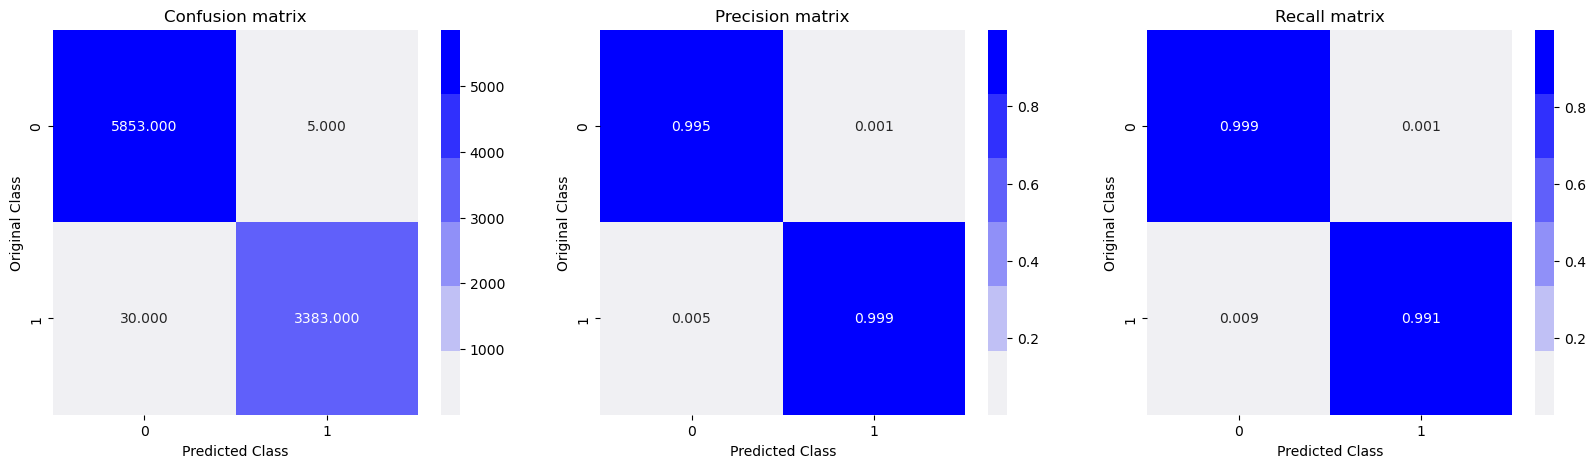

In [178]:
print(search.best_estimator_)
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',learning_rate =0.1 ,gamma = 0.5,n_estimators =200 ,max_depth = 5,reg_lambda =0.1 ,sub_sample = 0.9,colsample_bytree = 0.5)
clf_xgb.fit(bow_bigram_train,y_train,verbose = True)
pred_y = clf_xgb.predict(bow_bigram_train)
print("XGboost train data f1-score is {}".format(f1_score(y_train,pred_y)))
pred_y = clf_xgb.predict(bow_bigram_test)
print("XGboost test data f1-score is {}".format(f1_score(y_test,pred_y)))
plot_confusion_matrix(y_test,pred_y)

#### Summary of Machine learning models performance over bigram bag of words encoding

In [182]:
x = PrettyTable()
x.field_names = ["Model \ Parameters","Train f1_score","Test f1_score"]
x.add_row(["Logistic regression: ",0.996, 0.991])
x.add_row(["Linear SVM",0.993,0.988])
x.add_row(["XGBClassifier: ",0.997,0.994])
print(x)

+-----------------------+----------------+---------------+
|   Model \ Parameters  | Train f1_score | Test f1_score |
+-----------------------+----------------+---------------+
| Logistic regression:  |     0.996      |     0.991     |
|       Linear SVM      |     0.993      |     0.988     |
|    XGBClassifier:     |     0.997      |     0.994     |
+-----------------------+----------------+---------------+


#### Applying Logistic regression on unigram Tfidfvectorizer Encoding

In [185]:
#loading the unigram tfidf vectorizer unigram train and test data
tfidf_unigram_train = sparse.load_npz('train_data_tfidf_unigram.npz')
tfidf_unigram_test = sparse.load_npz('test_data_tfidf_unigram.npz')

For values of alpha =  1e-05 The f1-score is: 0.9885361552028219
For values of alpha =  0.0001 The f1-score is: 0.9818771180197436
For values of alpha =  0.001 The f1-score is: 0.9694349187416132
For values of alpha =  0.01 The f1-score is: 0.9119823649818927
For values of alpha =  0.1 The f1-score is: 0.8639694170117872
For values of alpha =  1 The f1-score is: 0.8338320995432351
For values of alpha =  10 The f1-score is: 0.833489827856025


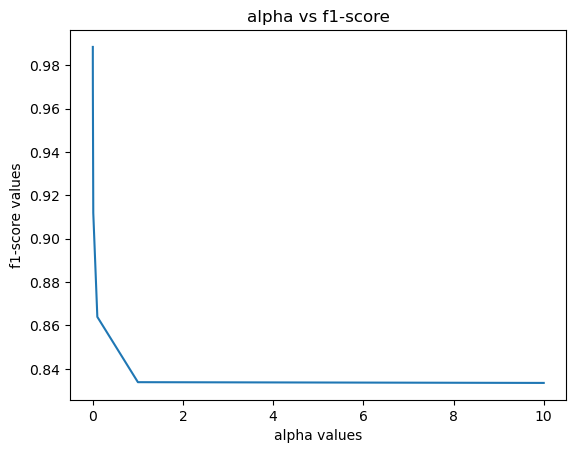

the best alpha value is 1e-05 having maximum f1-score
For the value of alpha 1e-05 train data f1-score is 0.994649039974819
For the value of alpha 1e-05 test data f1-score is 0.9885361552028219


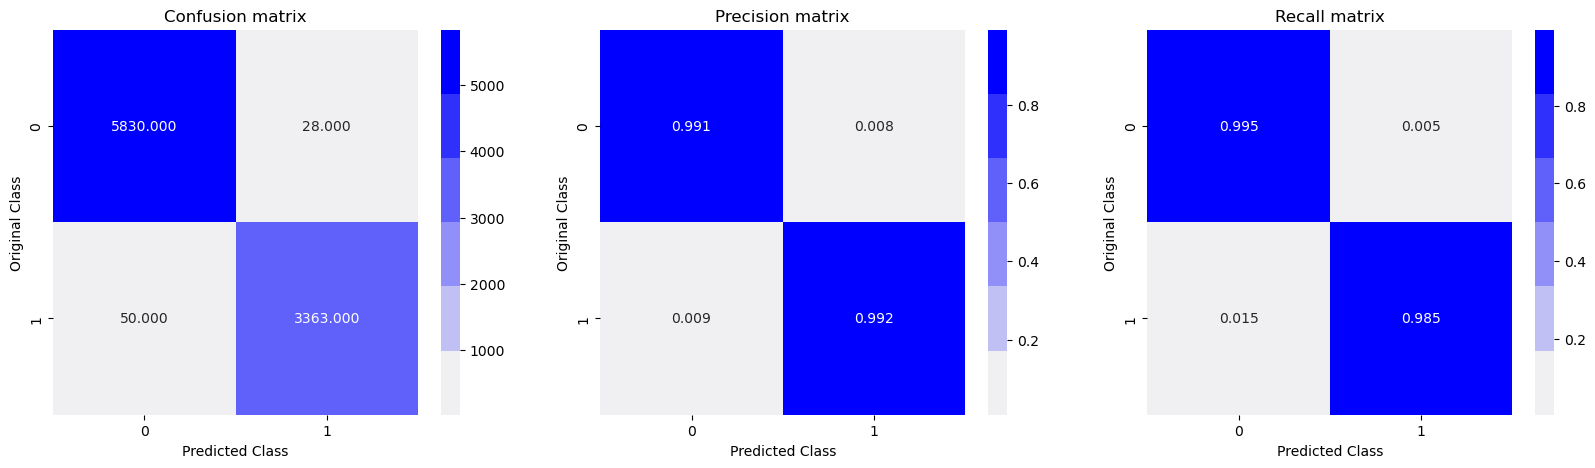

In [189]:
#call the build model function
build_model('log_loss', tfidf_unigram_train, tfidf_unigram_test)


#### Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The f1-score is: 0.9879305269355314
For values of alpha =  0.0001 The f1-score is: 0.9885428907168038
For values of alpha =  0.001 The f1-score is: 0.9795317331762627
For values of alpha =  0.01 The f1-score is: 0.9478485631746997
For values of alpha =  0.1 The f1-score is: 0.8866837387964148
For values of alpha =  1 The f1-score is: 0.8358490566037736
For values of alpha =  10 The f1-score is: 0.8320550946940053


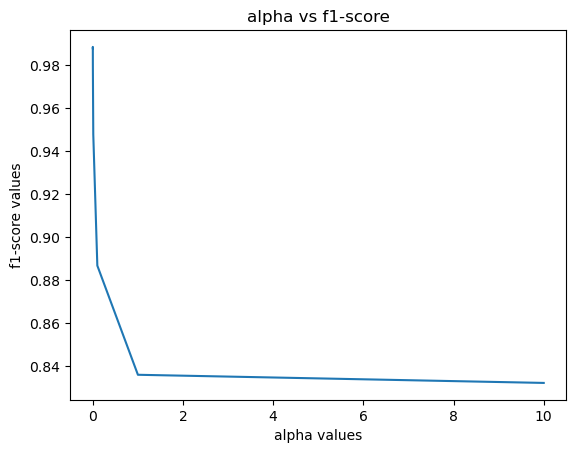

the best alpha value is 0.0001 having maximum f1-score
For the value of alpha 0.0001 train data f1-score is 0.9907237963021392
For the value of alpha 0.0001 test data f1-score is 0.9885428907168038


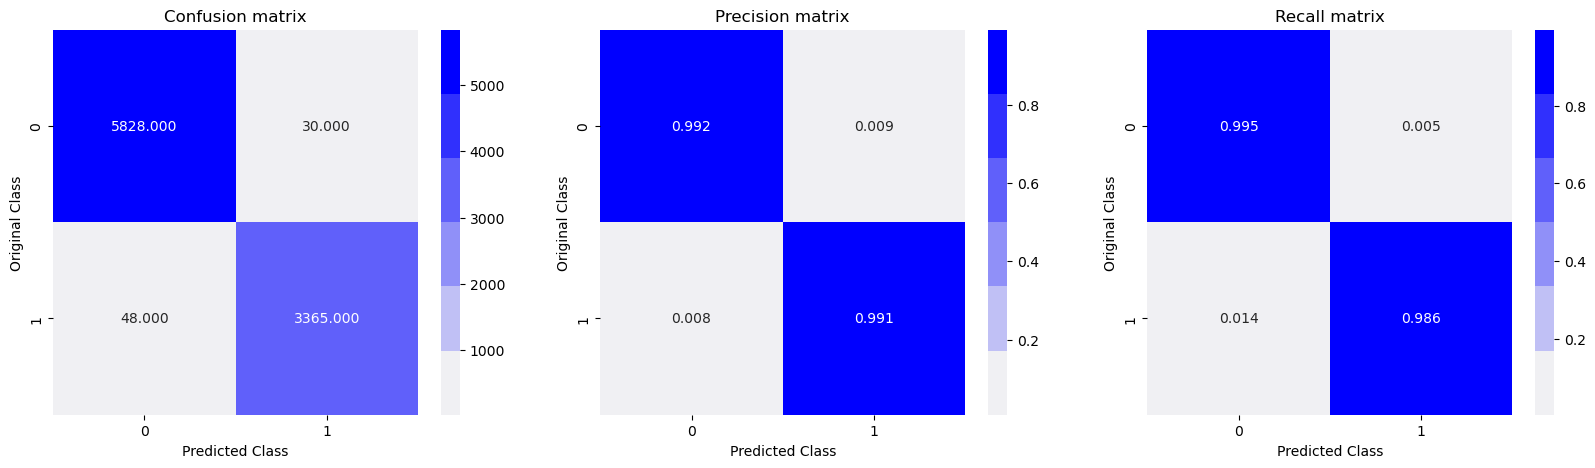

In [192]:
build_model('hinge',tfidf_unigram_train,tfidf_unigram_test)

#### XGboost with Hyperparameter tuning

In [196]:
parameters = {
    
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'n_estimators':[100,200,300],
    'gamma':[0,0.25,0.5],
    'reg_lambda':[0,0.10,10.0]
}

model = xgb.XGBClassifier(eval_metric='logloss')
search = RandomizedSearchCV(model,parameters,scoring = 'f1',cv=3,return_train_score=True,n_jobs = -1)
search.fit(tfidf_unigram_train,y_train)

results = pd.DataFrame.from_dict(search.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,14.710165,0.971496,0.253431,0.048598,0.1,300,3,0.05,0,"{'reg_lambda': 0.1, 'n_estimators': 300, 'max_...",...,0.994141,0.993392,0.993577,0.000407,6,0.995561,0.995749,0.995276,0.995528,0.000194
1,13.617047,0.796584,0.196403,0.013002,0.1,200,4,0.1,0.25,"{'reg_lambda': 0.1, 'n_estimators': 200, 'max_...",...,0.994329,0.995098,0.994590,0.000359,3,0.998114,0.998207,0.998018,0.998113,0.000077
2,5.603272,0.144193,0.096338,0.015192,0.1,100,3,0.01,0.5,"{'reg_lambda': 0.1, 'n_estimators': 100, 'max_...",...,0.951743,0.957185,0.952805,0.003231,10,0.953728,0.954121,0.956564,0.954805,0.001255
3,7.158060,0.092267,0.110651,0.013552,0.1,100,4,0.1,0.25,"{'reg_lambda': 0.1, 'n_estimators': 100, 'max_...",...,0.993007,0.993012,0.993452,0.000626,7,0.996129,0.995749,0.996031,0.995969,0.000161
4,12.945365,0.831671,0.150978,0.026426,0,100,5,0.1,0.25,"{'reg_lambda': 0, 'n_estimators': 100, 'max_de...",...,0.994709,0.994340,0.994589,0.000177,4,0.997925,0.997545,0.997451,0.997640,0.000205


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
XGboost train data f1-score is 0.9985535500911892
XGboost test data f1-score is 0.996624100983414


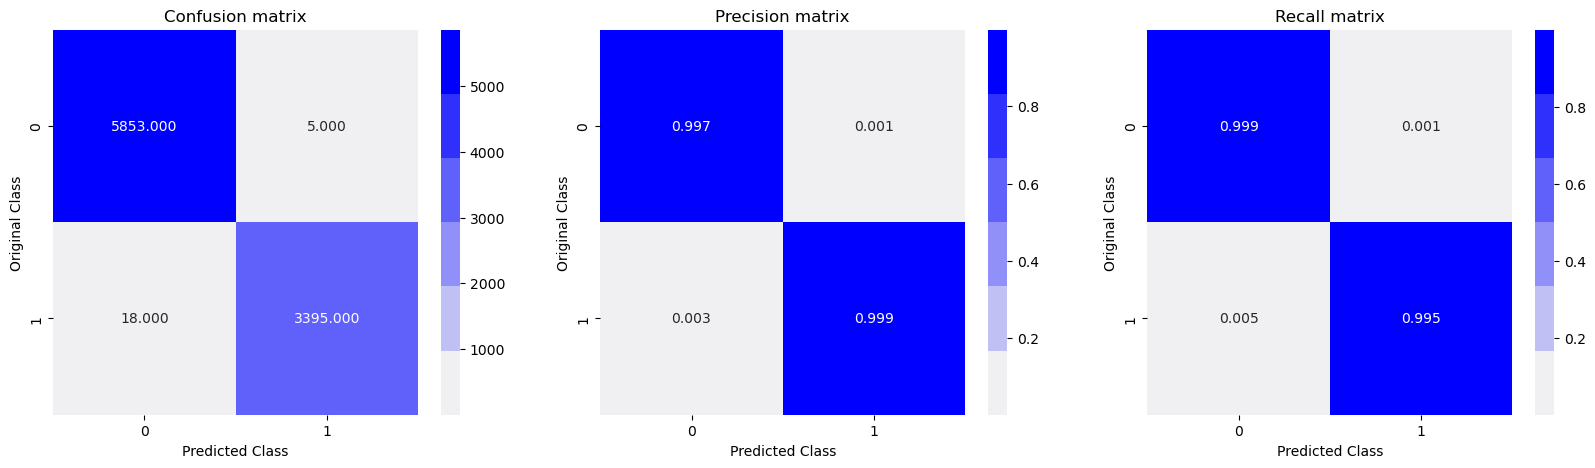

In [198]:
print(search.best_estimator_)
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',learning_rate =0.1 ,gamma = 0,n_estimators =200 ,max_depth = 5,reg_lambda =0 ,sub_sample = 0.9,colsample_bytree = 0.5)
clf_xgb.fit(tfidf_unigram_train,y_train,verbose = True)
pred_y = clf_xgb.predict(tfidf_unigram_train)
print("XGboost train data f1-score is {}".format(f1_score(y_train,pred_y)))
pred_y = clf_xgb.predict(tfidf_unigram_test)
print("XGboost test data f1-score is {}".format(f1_score(y_test,pred_y)))
plot_confusion_matrix(y_test,pred_y)

#### Summarization of machine learning model performance over unigram tfidf vectorizer encoding

In [201]:
x = PrettyTable()
x.field_names = ["Model \ Parameters","Train f1_score","Test f1_score"]
x.add_row(["Logistic regression: ",0.994, 0.990])
x.add_row(["Linear SVM",0.997,0.991])
x.add_row(["XGBClassifier: ",0.998,0.995])
print(x)

+-----------------------+----------------+---------------+
|   Model \ Parameters  | Train f1_score | Test f1_score |
+-----------------------+----------------+---------------+
| Logistic regression:  |     0.994      |      0.99     |
|       Linear SVM      |     0.997      |     0.991     |
|    XGBClassifier:     |     0.998      |     0.995     |
+-----------------------+----------------+---------------+


#### Logistic regression on bigram tfidf vectorizer

In [204]:
#loading the tfidf bigram vectorizer
tfidf_bigram_train = sparse.load_npz('train_data_tfidf_bigram.npz')
tfidf_bigram_test = sparse.load_npz('test_data_tfidf_bigram.npz')

For values of alpha =  1e-05 The f1-score is: 0.9857331960582438
For values of alpha =  0.0001 The f1-score is: 0.9776461880088823
For values of alpha =  0.001 The f1-score is: 0.965785148662782
For values of alpha =  0.01 The f1-score is: 0.9080278128950695
For values of alpha =  0.1 The f1-score is: 0.8643312101910828
For values of alpha =  1 The f1-score is: 0.833648393194707
For values of alpha =  10 The f1-score is: 0.8326811707622476


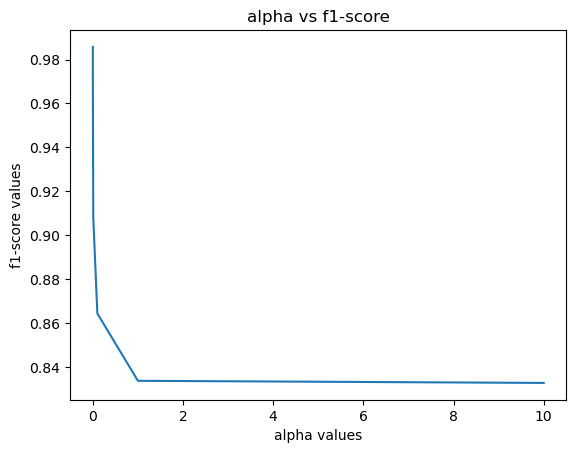

the best alpha value is 1e-05 having maximum f1-score
For the value of alpha 1e-05 train data f1-score is 0.9895800442058731
For the value of alpha 1e-05 test data f1-score is 0.9857331960582438


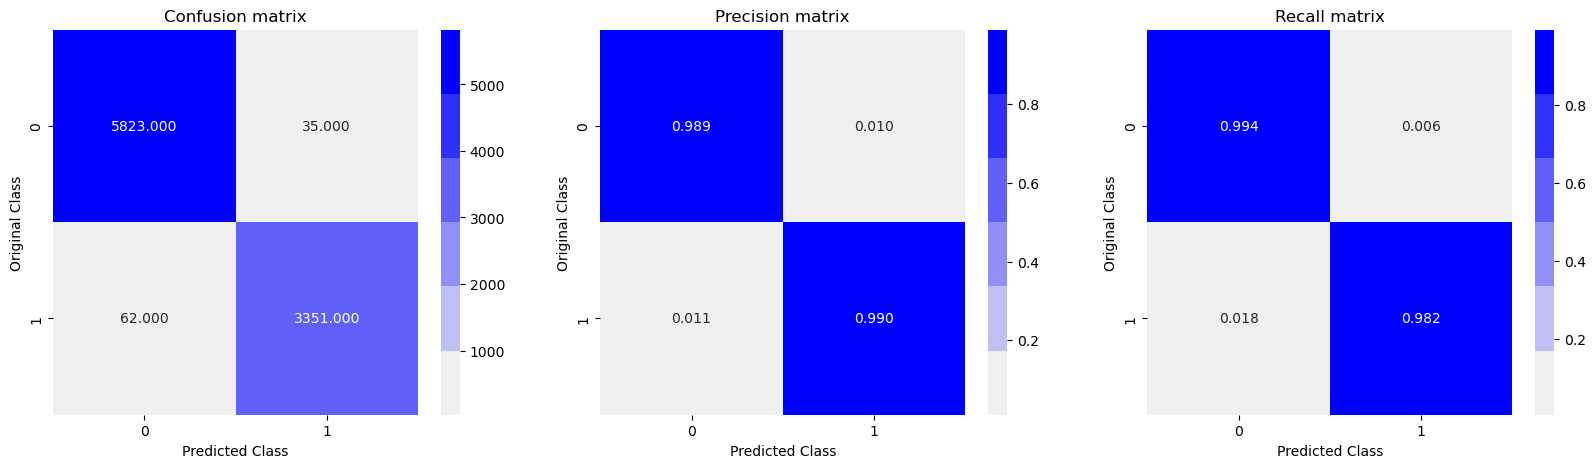

In [208]:
build_model('log_loss', tfidf_bigram_train, tfidf_bigram_test)


#### Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The f1-score is: 0.9872639437856829
For values of alpha =  0.0001 The f1-score is: 0.9860601614086574
For values of alpha =  0.001 The f1-score is: 0.9715892275821248
For values of alpha =  0.01 The f1-score is: 0.9409424724602203
For values of alpha =  0.1 The f1-score is: 0.8844430217669654
For values of alpha =  1 The f1-score is: 0.8360836083608361
For values of alpha =  10 The f1-score is: 0.8308846514535793


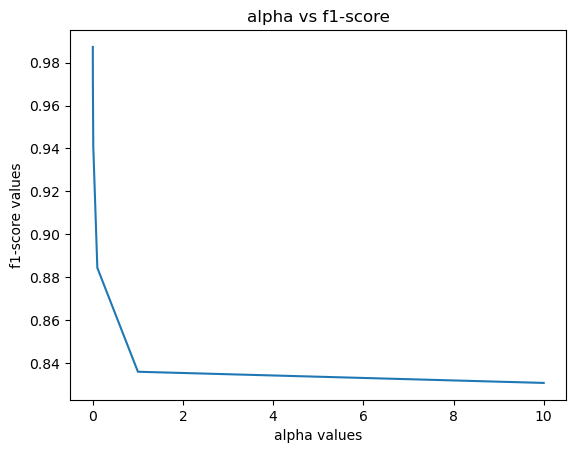

the best alpha value is 1e-05 having maximum f1-score
For the value of alpha 1e-05 train data f1-score is 0.9908753382417721
For the value of alpha 1e-05 test data f1-score is 0.9872639437856829


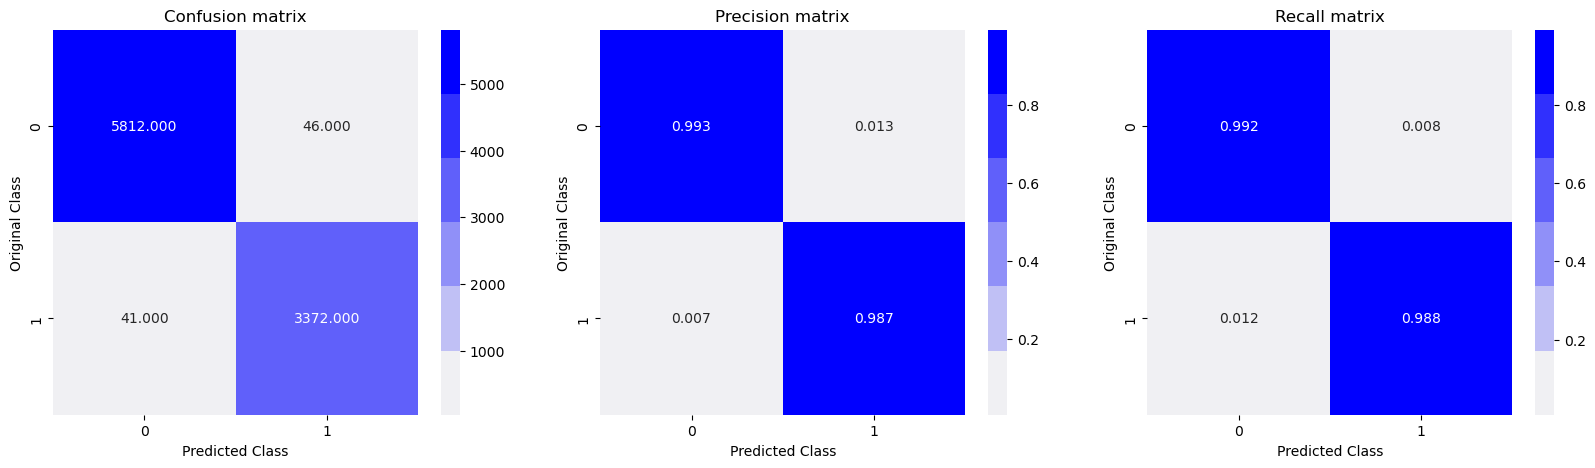

In [211]:
build_model('hinge',tfidf_bigram_train,tfidf_bigram_test)

#### Xgboost with hyperparameter tuning

In [214]:
parameters = {
    
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'n_estimators':[100,200,300],
    'gamma':[0,0.25,0.5],
    'reg_lambda':[0,0.10,10.0]
}

model = xgb.XGBClassifier(eval_metric='logloss')
search = RandomizedSearchCV(model,parameters,scoring = 'f1',cv=3,return_train_score=True,n_jobs = -1)
search.fit(tfidf_bigram_train,y_train)

results = pd.DataFrame.from_dict(search.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,18.498949,0.439867,0.253613,0.039838,0.1,300,3,0.05,0.25,"{'reg_lambda': 0.1, 'n_estimators': 300, 'max_...",...,0.991482,0.992447,0.991996,0.000396,3,0.993381,0.994335,0.993662,0.993793,0.000400
1,9.741172,0.100408,0.142458,0.015020,0.1,100,4,0.01,0,"{'reg_lambda': 0.1, 'n_estimators': 100, 'max_...",...,0.965651,0.973699,0.970761,0.003627,8,0.971247,0.973332,0.974201,0.972927,0.001239
2,40.972794,4.202889,0.237698,0.034487,0,200,5,0.05,0.25,"{'reg_lambda': 0, 'n_estimators': 200, 'max_de...",...,0.993002,0.993779,0.993519,0.000366,2,0.996318,0.996697,0.996031,0.996348,0.000273
3,22.026832,0.919935,0.207111,0.009273,0.1,200,4,0.1,0.5,"{'reg_lambda': 0.1, 'n_estimators': 200, 'max_...",...,0.993570,0.993592,0.993647,0.000093,1,0.996412,0.997262,0.996316,0.996664,0.000425
4,26.626280,0.373964,0.145356,0.037920,10.0,100,5,0.05,0,"{'reg_lambda': 10.0, 'n_estimators': 100, 'max...",...,0.988807,0.988649,0.988818,0.000143,4,0.989482,0.990629,0.991286,0.990466,0.000746


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
XGboost train data f1-score is 0.9959697732997481
XGboost test data f1-score is 0.9933872152828802


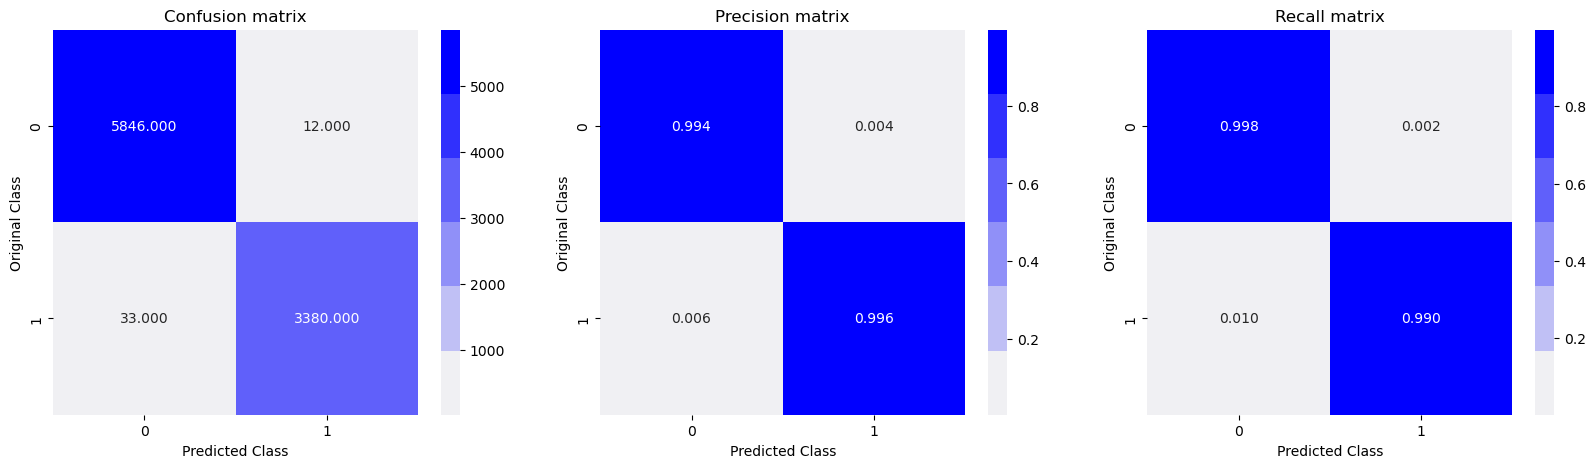

In [215]:
print(search.best_estimator_)
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',learning_rate =0.1 ,gamma = 0,n_estimators =100 ,max_depth = 5,reg_lambda =0.1 ,sub_sample = 0.9,colsample_bytree = 0.5)
clf_xgb.fit(tfidf_bigram_train,y_train,verbose = True)
pred_y = clf_xgb.predict(tfidf_bigram_train)
print("XGboost train data f1-score is {}".format(f1_score(y_train,pred_y)))
pred_y = clf_xgb.predict(tfidf_bigram_test)
print("XGboost test data f1-score is {}".format(f1_score(y_test,pred_y)))
plot_confusion_matrix(y_test,pred_y)

#### Summarization of machine learning model performance on tfidf vectorize bigram encoding

In [219]:
x = PrettyTable()
x.field_names = ["Model \ Parameters","Train f1_score","Test f1_score"]
x.add_row(["Logistic regression: ",0.992, 0.986])
x.add_row(["Linear SVM",0.995,0.987])
x.add_row(["XGBClassifier: ",0.995,0.994])
print(x)

+-----------------------+----------------+---------------+
|   Model \ Parameters  | Train f1_score | Test f1_score |
+-----------------------+----------------+---------------+
| Logistic regression:  |     0.992      |     0.986     |
|       Linear SVM      |     0.995      |     0.987     |
|    XGBClassifier:     |     0.995      |     0.994     |
+-----------------------+----------------+---------------+


#### Logistic regression on Average word2vec encoding

In [222]:
#loading the train and test data
with open(r"train_data_avg_word2vec", "rb") as input_file:
        avg_word2vec_train = pickle.load(input_file)
        

with open(r"test_data_avg_word2vec", "rb") as input_file:
        avg_word2vec_test = pickle.load(input_file)
        

For values of alpha =  1e-05 The f1-score is: 0.9857708669502714
For values of alpha =  0.0001 The f1-score is: 0.9861479516651931
For values of alpha =  0.001 The f1-score is: 0.9820005901445854
For values of alpha =  0.01 The f1-score is: 0.9634037488842606
For values of alpha =  0.1 The f1-score is: 0.9442593153589821
For values of alpha =  1 The f1-score is: 0.8491286307053942
For values of alpha =  10 The f1-score is: 0.8045894585873072


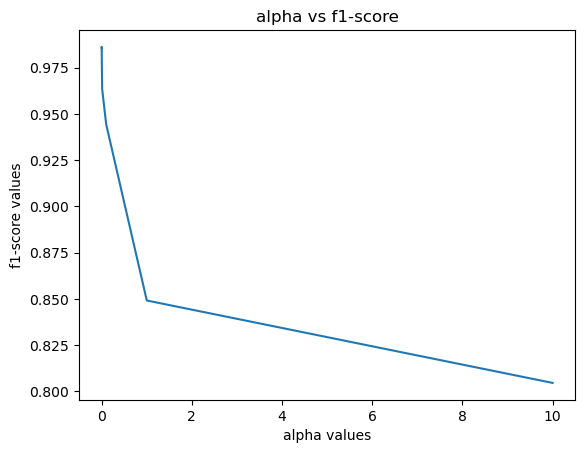

the best alpha value is 0.0001 having maximum f1-score
For the value of alpha 0.0001 train data f1-score is 0.9885551691432185
For the value of alpha 0.0001 test data f1-score is 0.9861479516651931


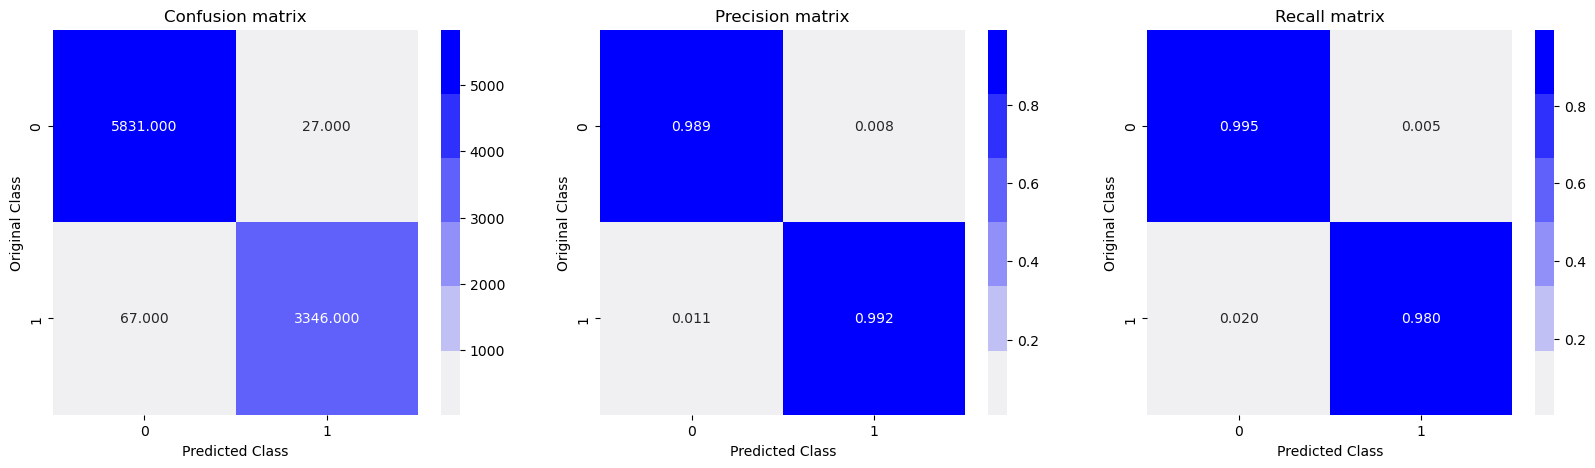

In [226]:
build_model('log_loss', avg_word2vec_train, avg_word2vec_test)


####  Linear SVM with hyperparameter Tuning

For values of alpha =  1e-05 The f1-score is: 0.9848951459158234
For values of alpha =  0.0001 The f1-score is: 0.9870778267254038
For values of alpha =  0.001 The f1-score is: 0.9871851524524967
For values of alpha =  0.01 The f1-score is: 0.9770655689503087
For values of alpha =  0.1 The f1-score is: 0.9557548579970104
For values of alpha =  1 The f1-score is: 0.8949465965247888
For values of alpha =  10 The f1-score is: 0.7084685439129069


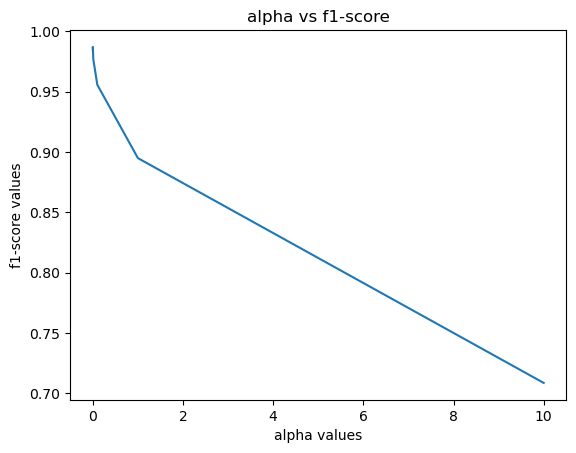

the best alpha value is 0.001 having maximum f1-score
For the value of alpha 0.001 train data f1-score is 0.9875654863346588
For the value of alpha 0.001 test data f1-score is 0.9871851524524967


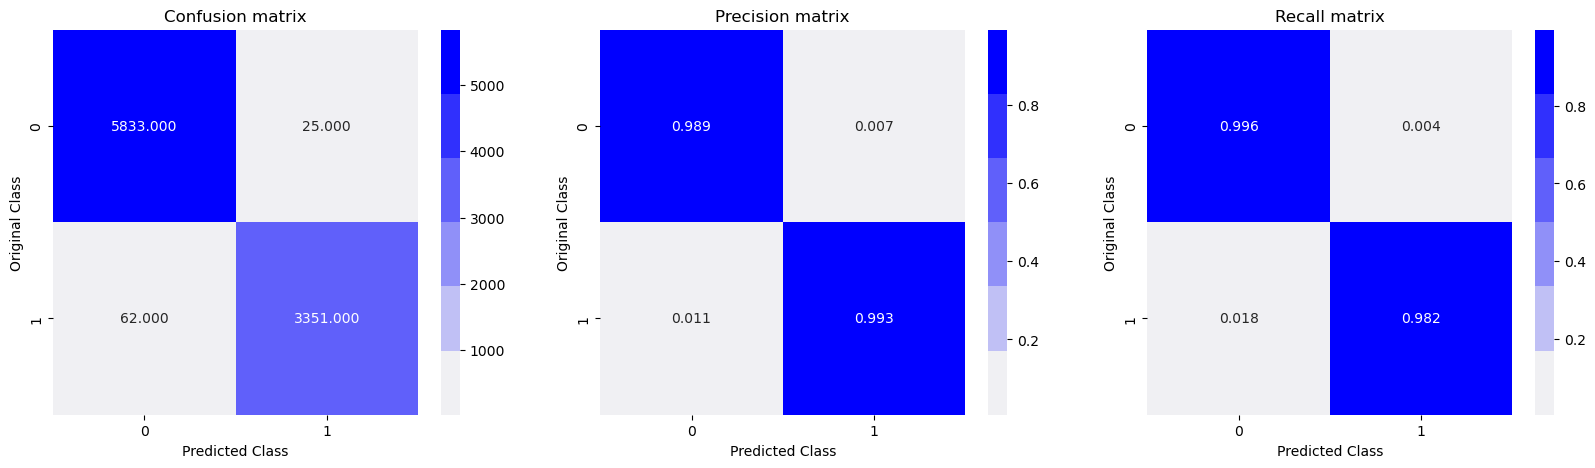

In [229]:
build_model('hinge',avg_word2vec_train,avg_word2vec_test)

#### XGboost with hyperparameter tuning

In [234]:
parameters = {
    
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'n_estimators':[100,200,300],
    'gamma':[0,0.25,0.5],
    'reg_lambda':[0,0.10,10.0]
}

model = xgb.XGBClassifier(eval_metric='logloss')
search = RandomizedSearchCV(model,parameters,scoring = 'f1',cv=3,return_train_score=True,n_jobs = -1)
search.fit(avg_word2vec_train,y_train)

results = pd.DataFrame.from_dict(search.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,11.056821,0.272119,0.200278,0.006570,0,100,3,0.1,0,"{'reg_lambda': 0, 'n_estimators': 100, 'max_de...",...,0.991489,0.993761,0.992690,0.000932,5,0.996884,0.996695,0.997357,0.996979,0.000279
1,21.687033,0.219851,0.247338,0.020672,0,200,5,0.1,0.25,"{'reg_lambda': 0, 'n_estimators': 200, 'max_de...",...,0.994515,0.995656,0.995025,0.000474,3,0.999529,0.999434,0.999529,0.999497,0.000044
2,11.477379,0.666287,0.202590,0.004343,0.1,100,3,0.01,0.25,"{'reg_lambda': 0.1, 'n_estimators': 100, 'max_...",...,0.968869,0.974446,0.972219,0.002411,10,0.974117,0.974806,0.972404,0.973776,0.001010
3,29.262860,0.505794,0.287669,0.013854,10.0,300,3,0.01,0.5,"{'reg_lambda': 10.0, 'n_estimators': 300, 'max...",...,0.976506,0.979005,0.978288,0.001268,8,0.980021,0.980971,0.980229,0.980407,0.000408
4,31.480813,0.540651,0.273584,0.008486,0,300,4,0.05,0.5,"{'reg_lambda': 0, 'n_estimators': 300, 'max_de...",...,0.994897,0.995655,0.995088,0.000408,2,0.999434,0.999340,0.999434,0.999403,0.000044


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
XGboost train data f1-score is 0.9991201608848668
XGboost test data f1-score is 0.9957434316747394


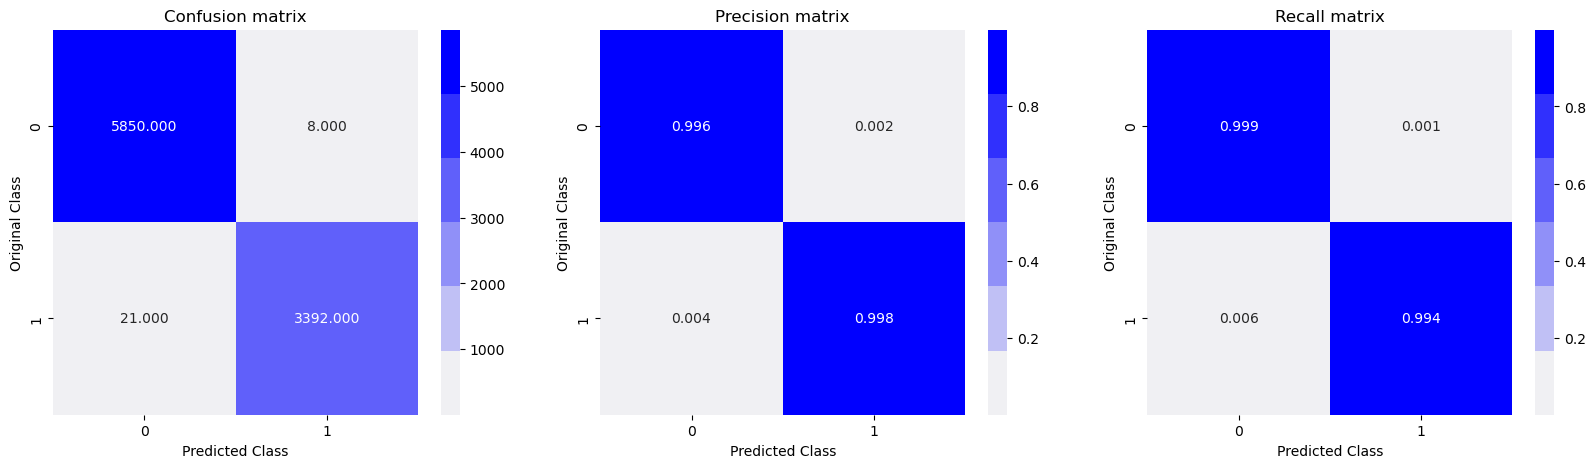

In [233]:
print(search.best_estimator_)
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',learning_rate =0.1 ,gamma = 0.5,n_estimators =200 ,max_depth = 3,reg_lambda =0.1 ,sub_sample = 0.9,colsample_bytree = 0.5)
clf_xgb.fit(avg_word2vec_train,y_train,verbose = True)
pred_y = clf_xgb.predict(avg_word2vec_train)
print("XGboost train data f1-score is {}".format(f1_score(y_train,pred_y)))
pred_y = clf_xgb.predict(avg_word2vec_test)
print("XGboost test data f1-score is {}".format(f1_score(y_test,pred_y)))
plot_confusion_matrix(y_test,pred_y)

#### Summarization of ML models on avg word2vec encoding

In [238]:
x = PrettyTable()
x.field_names = ["Model \ Parameters","Train f1_score","Test f1_score"]
x.add_row(["Logistic regression: ",0.989, 0.987])
x.add_row(["Linear SVM",0.989,0.988])
x.add_row(["XGBClassifier: ",0.998,0.995])
print(x)

+-----------------------+----------------+---------------+
|   Model \ Parameters  | Train f1_score | Test f1_score |
+-----------------------+----------------+---------------+
| Logistic regression:  |     0.989      |     0.987     |
|       Linear SVM      |     0.989      |     0.988     |
|    XGBClassifier:     |     0.998      |     0.995     |
+-----------------------+----------------+---------------+


#### Logistic regression on tfidf word2vec Encoding

In [241]:
#loading the train and test data
with open(r"train_data_tfidf_word2vec", "rb") as input_file:
        tfidf_word2vec_train = pickle.load(input_file)
        

with open(r"test_data_tfidf_word2vec", "rb") as input_file:
        tfidf_word2vec_test = pickle.load(input_file)
        

For values of alpha =  1e-05 The f1-score is: 0.9857708669502714
For values of alpha =  0.0001 The f1-score is: 0.9861479516651931
For values of alpha =  0.001 The f1-score is: 0.9820005901445854
For values of alpha =  0.01 The f1-score is: 0.9634037488842606
For values of alpha =  0.1 The f1-score is: 0.9442593153589821
For values of alpha =  1 The f1-score is: 0.8491286307053942
For values of alpha =  10 The f1-score is: 0.8045894585873072


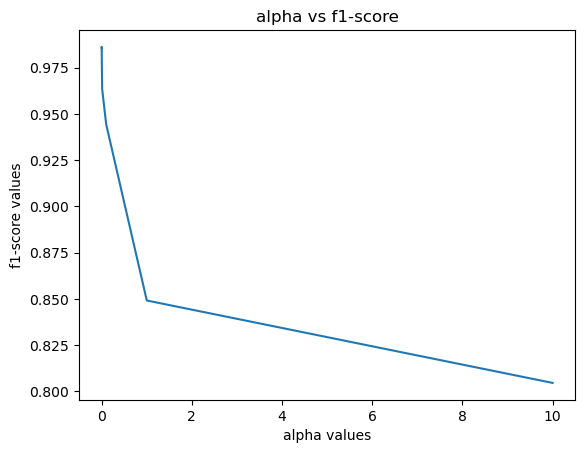

the best alpha value is 0.0001 having maximum f1-score
For the value of alpha 0.0001 train data f1-score is 0.9885551691432185
For the value of alpha 0.0001 test data f1-score is 0.9861479516651931


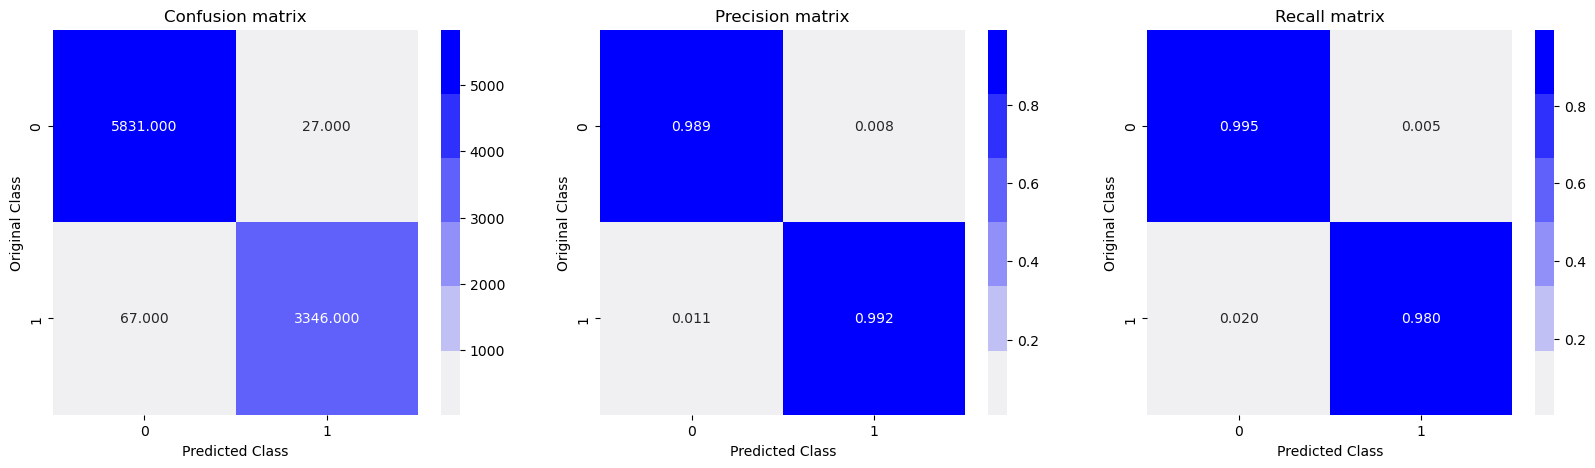

In [245]:
build_model('log_loss', avg_word2vec_train, avg_word2vec_test)


####  linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The f1-score is: 0.9856304985337243
For values of alpha =  0.0001 The f1-score is: 0.9886947584789312
For values of alpha =  0.001 The f1-score is: 0.9879305269355314
For values of alpha =  0.01 The f1-score is: 0.9828908554572271
For values of alpha =  0.1 The f1-score is: 0.9682421350827494
For values of alpha =  1 The f1-score is: 0.8102670828997572
For values of alpha =  10 The f1-score is: 0.5397754230586747


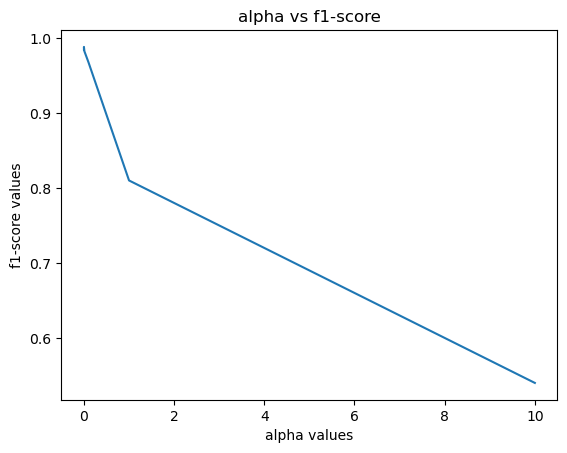

the best alpha value is 0.0001 having maximum f1-score
For the value of alpha 0.0001 train data f1-score is 0.9889555064689176
For the value of alpha 0.0001 test data f1-score is 0.9886947584789312


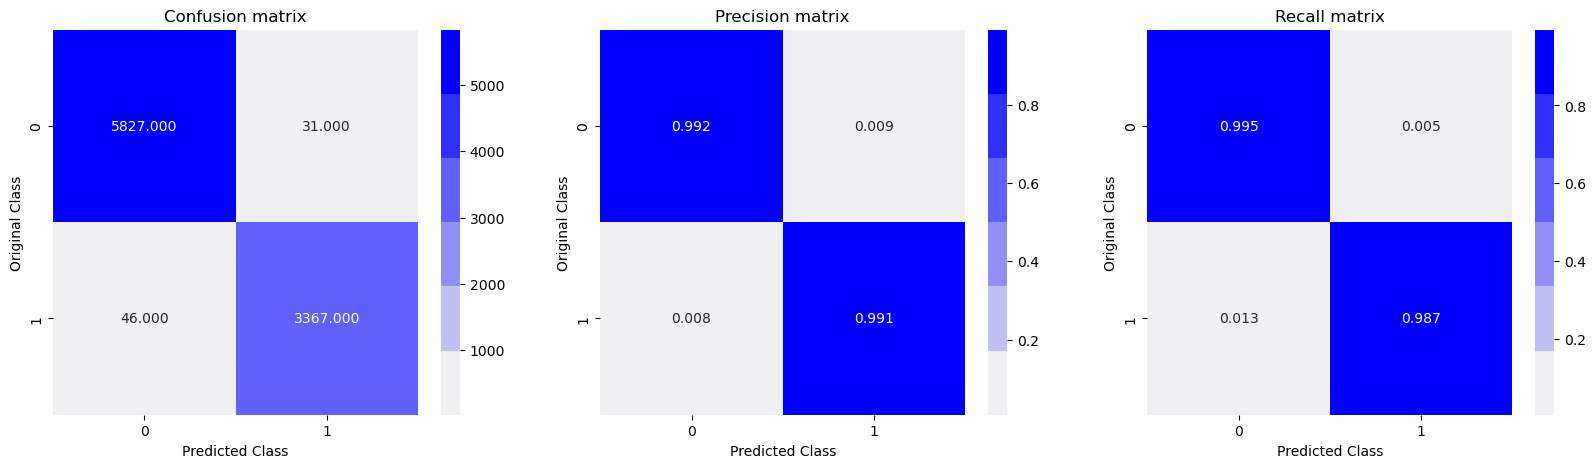

In [248]:
build_model('hinge',tfidf_word2vec_train,tfidf_word2vec_test)

#### XGboost with Hyperparameter tuning

In [251]:
parameters = {
    
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'n_estimators':[100,200,300],
    'gamma':[0,0.25,0.5],
    'reg_lambda':[0,0.10,10.0]
}

model = xgb.XGBClassifier(eval_metric='logloss')
search = RandomizedSearchCV(model,parameters,scoring = 'f1',cv=3,return_train_score=True,n_jobs = -1)
search.fit(tfidf_word2vec_train,y_train)

results = pd.DataFrame.from_dict(search.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,15.844554,0.290146,0.188650,0.004511,0.1,100,5,0.1,0.5,"{'reg_lambda': 0.1, 'n_estimators': 100, 'max_...",...,0.993385,0.994705,0.994329,0.000672,2,0.999152,0.999152,0.998868,0.999057,0.000133
1,17.360085,0.265106,0.201702,0.021857,0.1,100,5,0.05,0.25,"{'reg_lambda': 0.1, 'n_estimators': 100, 'max_...",...,0.992057,0.992808,0.993000,0.000859,7,0.995649,0.996031,0.996313,0.995998,0.000272
2,10.357656,0.141670,0.176131,0.012497,0,100,3,0.01,0.25,"{'reg_lambda': 0, 'n_estimators': 100, 'max_de...",...,0.959302,0.961457,0.962701,0.003398,10,0.964783,0.965038,0.962769,0.964197,0.001015
3,25.163934,0.421126,0.255101,0.006766,10.0,200,4,0.05,0.5,"{'reg_lambda': 10.0, 'n_estimators': 200, 'max...",...,0.992623,0.993570,0.993194,0.000410,6,0.996412,0.996032,0.996600,0.996348,0.000236
4,24.407590,0.535337,0.253398,0.004749,0.1,200,4,0.05,0.25,"{'reg_lambda': 0.1, 'n_estimators': 200, 'max_...",...,0.993951,0.994139,0.994078,0.000090,5,0.998302,0.998491,0.998585,0.998459,0.000118


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
XGboost train data f1-score is 0.999057137469357
XGboost test data f1-score is 0.9952968841857731


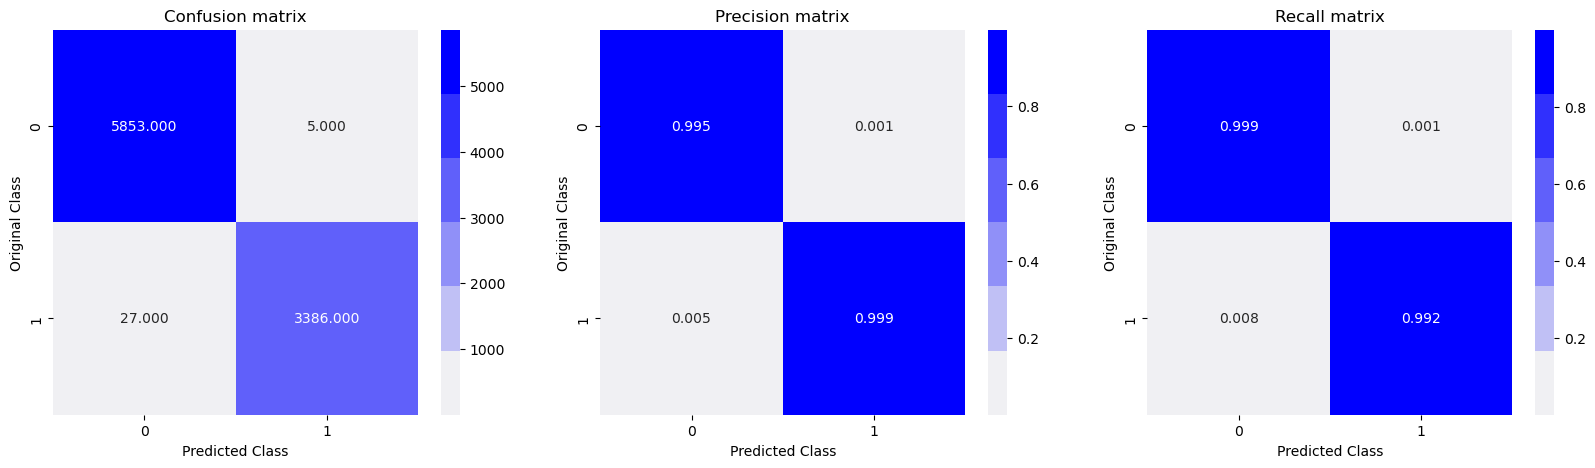

In [252]:
print(search.best_estimator_)
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',learning_rate =0.1 ,gamma = 0,n_estimators =300 ,max_depth = 5,reg_lambda =10.0 ,sub_sample = 0.9,colsample_bytree = 0.5)
clf_xgb.fit(tfidf_word2vec_train,y_train,verbose = True)
pred_y = clf_xgb.predict(tfidf_word2vec_train)
print("XGboost train data f1-score is {}".format(f1_score(y_train,pred_y)))
pred_y = clf_xgb.predict(tfidf_word2vec_test)
print("XGboost test data f1-score is {}".format(f1_score(y_test,pred_y)))
plot_confusion_matrix(y_test,pred_y)

#### Summarizing all the models for each encoding

In [258]:
x = PrettyTable()
x.field_names = ["Encoding","Model","Train f1_score","Test f1_score"]
x.add_row(["Unigram bag of words","Logistic regression",0.995,0.992])
x.add_row(["","Linear SVM",0.998,0.995])
x.add_row(["","XGboost classifier",0.998,0.995])
x.add_row(["bigram bag of words","Logistic regression",0.994,0.988])
x.add_row(["","Linear SVM",0.994,0.987])
x.add_row(["","XGboost classifier",0.997,0.995])
x.add_row(["Unigram tfidf vectorizer","Logistic regression",0.992,0.991])
x.add_row(["","Linear SVM",0.991,0.991])
x.add_row(["","XGboost classifier",0.998,0.996])
x.add_row(["bigram tfidf vectorizer","Logistic regression",0.991,0.986])
x.add_row(["","Linear SVM",0.994,0.988])
x.add_row(["","XGboost classifier",0.995,0.996])
x.add_row(["Average Word2vec Encoding","Logistic regression",0.990,0.988])
x.add_row(["","Linear SVM",0.989,0.990])
x.add_row(["","XGboost classifier",0.998,0.995])
x.add_row(["Tfidf Word2vec Encoding","Logistic regression",0.992,0.989])
x.add_row(["","Linear SVM",0.989,0.989])
x.add_row(["","XGboost classifier",0.998,0.995])
print(x)

+---------------------------+---------------------+----------------+---------------+
|          Encoding         |        Model        | Train f1_score | Test f1_score |
+---------------------------+---------------------+----------------+---------------+
|    Unigram bag of words   | Logistic regression |     0.995      |     0.992     |
|                           |      Linear SVM     |     0.998      |     0.995     |
|                           |  XGboost classifier |     0.998      |     0.995     |
|    bigram bag of words    | Logistic regression |     0.994      |     0.988     |
|                           |      Linear SVM     |     0.994      |     0.987     |
|                           |  XGboost classifier |     0.997      |     0.995     |
|  Unigram tfidf vectorizer | Logistic regression |     0.992      |     0.991     |
|                           |      Linear SVM     |     0.991      |     0.991     |
|                           |  XGboost classifier |     0.998    

#### Summarizing the best model test f1 score from each encoding and ngram range

In [261]:
x = PrettyTable()
x.field_names = ["BEST_Model \ Parameters","Category","Test f1_score"]
x.add_row(["XGboost: ",'Unigram bag of words', 0.995])
x.add_row(["XGboost","unigram tfidf vectorizer",0.995])
x.add_row(["XGboost: ","avg word2vec",0.994])
x.add_row(["XGboost: ","tfidf word2vec",0.995])
print(x)

+-------------------------+--------------------------+---------------+
| BEST_Model \ Parameters |         Category         | Test f1_score |
+-------------------------+--------------------------+---------------+
|        XGboost:         |   Unigram bag of words   |     0.995     |
|         XGboost         | unigram tfidf vectorizer |     0.995     |
|        XGboost:         |       avg word2vec       |     0.994     |
|        XGboost:         |      tfidf word2vec      |     0.995     |
+-------------------------+--------------------------+---------------+


#### Feature importance of best model

###### Unigram bag of words Encoding with xgboost model gives best f1 score so will plot the feature importances of that model

In [271]:
imp_feat = []
feat_val = []

# Retrieve bag-of-words feature names
bow_features = train_bow.get_feature_names_out()  # Updated to use get_feature_names_out()

# Retrieve the feature names from the additional data
data_ = data.columns
data_ = list(data_)

# Ensure you're combining different feature types appropriately
final_data = list(bow_features) + data_  # Combine features

# Sort the indices of feature importances
sorted_idx = np.argsort(clf_xgb.feature_importances_)[::-1]

# Loop through sorted indices and collect important features
for i in sorted_idx:
    if i < len(final_data) and clf_xgb.feature_importances_[i] != 0:  # Check if index is within bounds
        imp_feat.append(final_data[i])
        feat_val.append(clf_xgb.feature_importances_[i])

# Optionally print the important features and their values
print("Important Features:", imp_feat)
print("Feature Values:", feat_val)



Important Features: ['10328', '10161', '1000', '11640', '11690', '10', '1151', '11615910j', '1167', '0x64', '0199e', '1161', '1140', '1132', '0x717a767a71', '1146', '115', '0x77616974666f722064656c61792027303a303a31302700', '10459', '1150', '1097', '00916150z', '09', '000003', '1014', '1148', '1147', '01119e', '04146926a', '1087', '05636576n', '07375030b', '10302390t', '00454e', '0841e', '09196e', '00245e', '06363808f', '0x73656c', '06918701w', '1011', '1018', '0x5c', '1076', '0utaperc09', '05723e', '056cun95v08ac497', '1100', '1045', '11406', '1165', '03', '1064', '1113', '08490721h', '0n9ped7', '0x52515a50', '1119', '1111', '1157', '109', '1084', '1061', '1166', '1170', '1083', '11106027v', '1090', '1071', '116', '007tv', '1044', '10000000', '08enmand15a', '07608453f', '0esino1o', '10d', '1124', '07', '11635', '10665', '1168', '1136e', '1155', '1062', '03007e', '1134', '11358e', '112', '037r20n0do', '06099e', '1069', '08686877f', '1121', '0o380ado6', '1026', '04492457m', '10836981w',

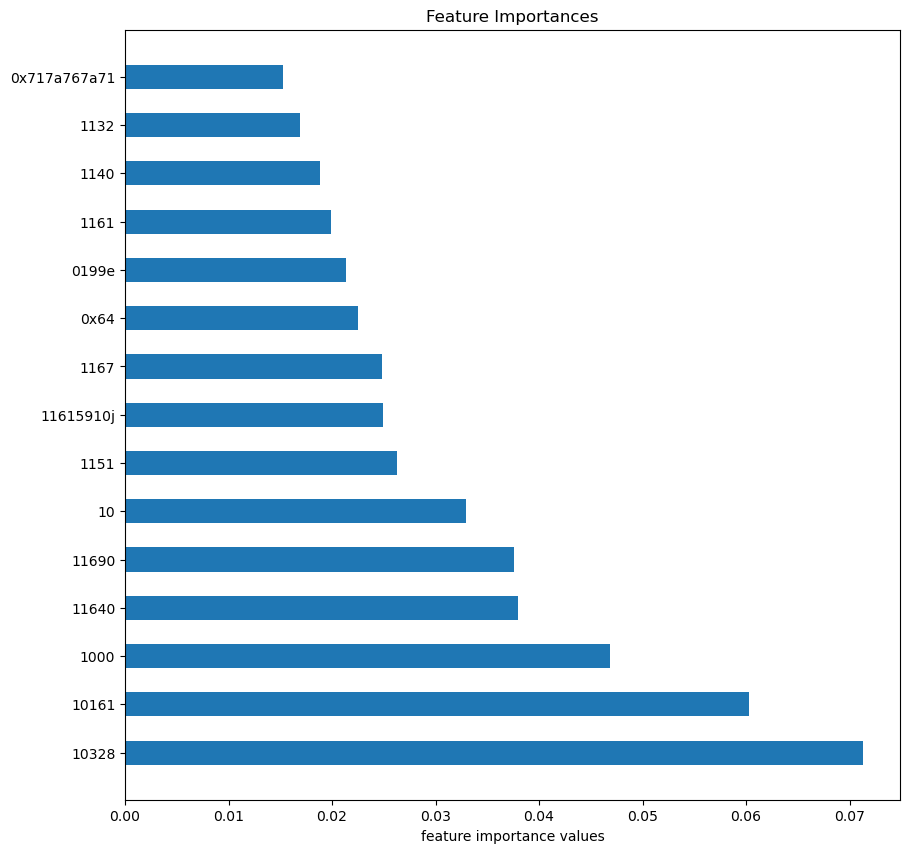

In [273]:
#plotting only top 15 features because data contains lot of features
#plotting feature importances 
plt.figure(figsize = (10,10))
plt.title("Feature Importances")
plt.barh(imp_feat[:15],feat_val[:15],height = 0.5)
plt.xlabel('feature importance values')
plt.show()

#### Observations :
######      The above graph shows only top 15 features which are helpful in classifying the labels.
######      From unigram bag of words encoding we got some useful features that are on,then,join,null etc.
######      From the feature Engineering we have done in featurization notebook the important features we got are no_double_qts(number of double quotations), no_hexa(number of hexadecimal values), no_single_qts(number of single quotations)


In [ ]:
###Conclusions :

In each category XGboost classifier given the best f1-score
Bigrams provide less f1 score than unigrams we can see from the above table.
we got the test f1 score of 0.995 for three models. we can choose any one of them for classification.
From the feature engineering we have done we got no_double_qts,no_hexa and no_single_qts as the top features